<a href="https://colab.research.google.com/github/SVMahalle/claimed/blob/master/SRP_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Team
##### **Team Member**     - Shrikant Mahalle
##### **Team Member**     - Rohit Thakare


# **Project Summary -**

In e-commerce companies like online retails, customer segmentation is necessary in order to understand customers behaviors. It leverages aqcuired customer data like the one we have in our case, transactions data in order to divide customers into groups.

Our goal in this Notebook is to cluster our customers to get insights in:

#####1.Increasing revenue (Knowing customers who present most of our revenue)
#####2.Increasing customer retention
#####3.Discovering Trends and patterns
#####4.Defining customers at risk

# **GitHub Link -**

https://github.com/shri-97/Online_Retail_Customer_Segmentation

# **Problem Statement**


### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples , silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



### Dataset Loading

In [2]:
# Load Dataset
url= 'https://drive.google.com/file/d/1YXhdzC9D_I5iIIuuwyQVvcPgRMxBxGS1/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
Retail = pd.read_csv(url)

### Dataset First View

In [3]:
# Dataset First Look
Retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [4]:
Retail.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/11 12:50       0.85     12680.0  France  
541905  12/9/11 12:50       2.10     12680.0  France  
541906  12/9/11 12:50       4.15     12680.0  France  
541907  12/9/11 12:50       4.15     12680.0  France  
541908  12/9/11 12:50       4.95     12680.0  France

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'We have total {Retail.shape[0]} rows & {Retail.shape[1]} columns.')

We have total 541909 rows & 8 columns.


In [6]:
#Create a copy of data set
Retail_Shri = Retail.copy()

### Dataset Information

In [7]:
# Dataset Info
Retail_Shri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
Retail_Shri.duplicated().value_counts()

False    536641
True       5268
dtype: int64

<Axes: ylabel='count'>

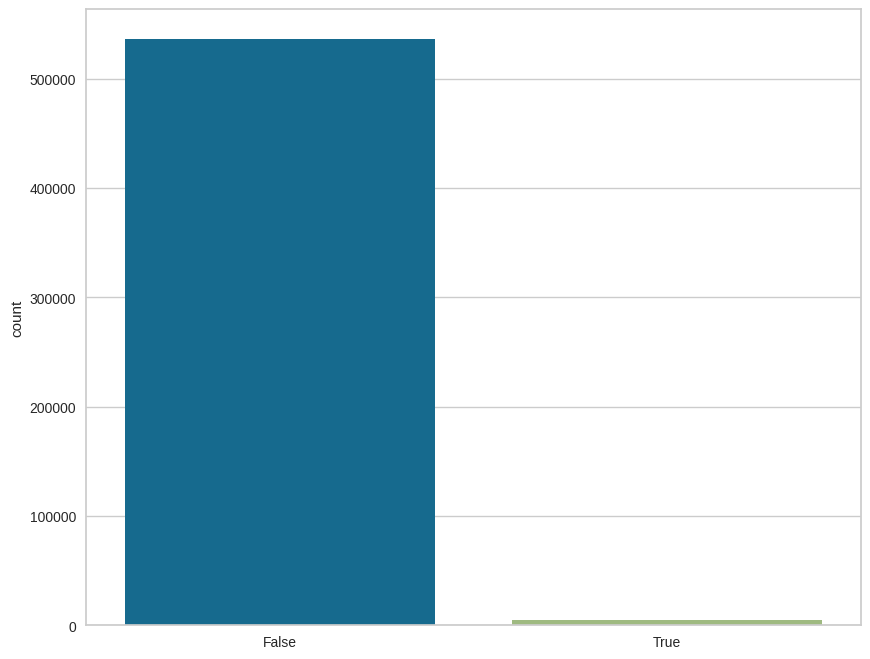

In [9]:
#Visualization of duplicated value
plt.figure(figsize=(10,8))
sns.countplot(x=Retail_Shri.duplicated())

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Retail_Shri.isnull().sum().sort_values(ascending = False)[:].reset_index().rename(columns={'index':'Columns',0:'Null Values'})

Columns  Null Values
0   CustomerID       135080
1  Description         1454
2    InvoiceNo            0
3    StockCode            0
4     Quantity            0
5  InvoiceDate            0
6    UnitPrice            0
7      Country            0

In [11]:
df_null = round(100*(Retail_Shri.isnull().sum())/len(Retail_Shri), 2).sort_values(ascending=False)
df_null

CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64

<Axes: >

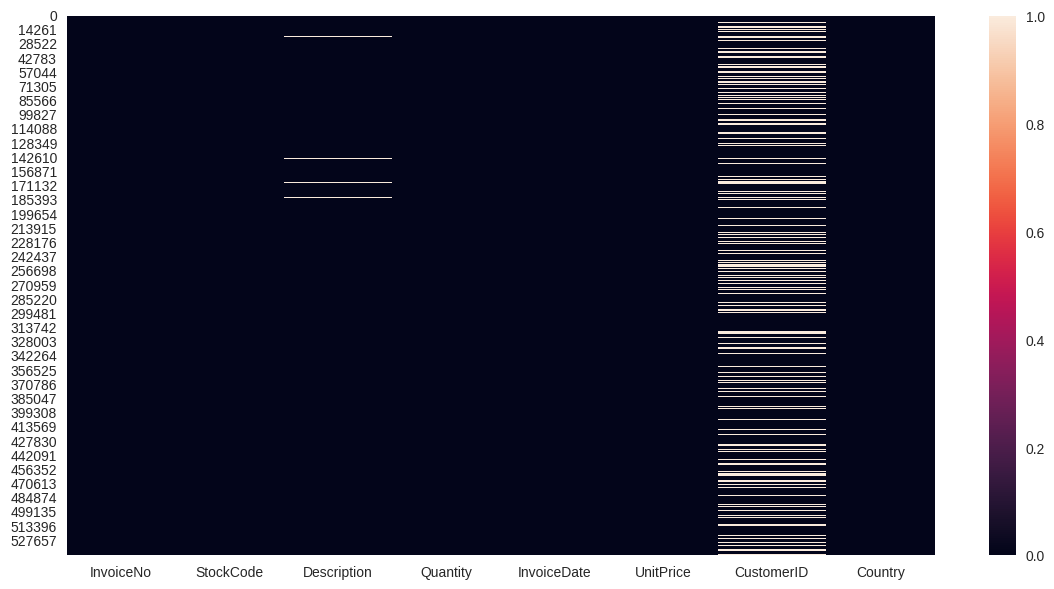

In [12]:
# Visualizing the missing values
plt.figure(figsize=(14,7))
sns.heatmap(Retail_Shri.isnull())

### What did you know about your dataset?

**In the Retail dataset, Total 541909 Rows & 8 Columns is present. 5268 rows are duplicated in the dataset. 24.93% values in CustomerID & 0.27% values in description are null values**

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
Retail_Shri.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
# Dataset Describe
Retail_Shri.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description

**Minimum value in Quantity is negative & Maximum value is too high.We assume it's a outlier in the dataset.**

### Check Unique Values for each variable.

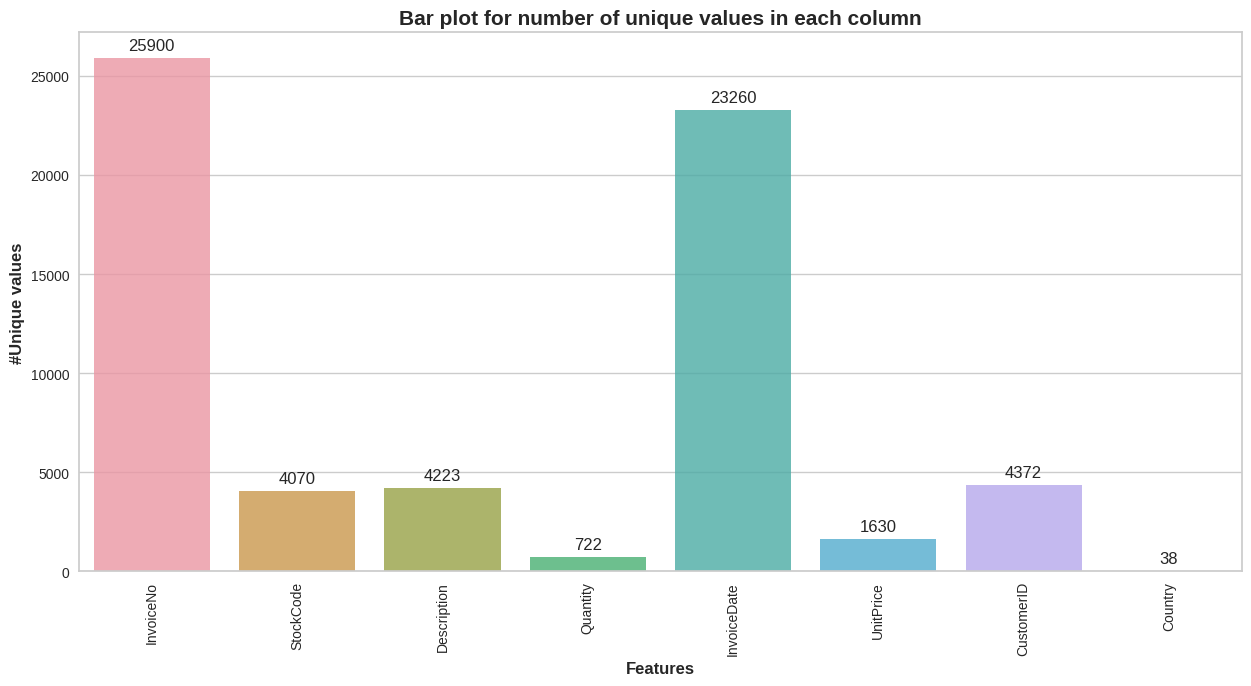

In [15]:
# Check Unique Values for each variable.
unique_df=pd.DataFrame()
unique_df['Features']=Retail_Shri.columns
unique=[]
for i in Retail_Shri.columns:
  unique.append(Retail_Shri[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
#Drop the null values
Retail_Shri.dropna(inplace=True)

In [17]:
#Sucessfully dropped the null values
Retail_Shri.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
Retail_Shri.shape

(406829, 8)

In [19]:
#Drop the duplicate values
Retail_Shri.drop_duplicates(inplace = True)

In [20]:
Retail_Shri.describe()

Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000

In [21]:
Retail_Shri[Retail_Shri['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

          InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/10 9:41      27.50     14527.0  United Kingdom  
154      12/1/10 9:49       4.65     15311.0  United Kingdom  
235     12/1/10 10:24       1.65     17548.0  United Kingdom  
236     12/1/10 10:24       0.29     17548.0  United Kingdom  
237     12/1/10 10:24       0.29     17548.0  United Kingdom  
...               ...        ...         ...             ...  
540449   12/9/11 9:57       0.83     14397.0  United Kingdom  
541541  12/9/11 10:28     224.69     15498.0  United Kingdom  
541715  12/9/11 11:57      10.95     15311.0  United Kingdom  
541716  12/9/11 11:58       1.25     17315.0  United Kingdom  
541717  12/9/11 11:58       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [22]:
# Remove invoices starting with 'C'
data = Retail_Shri[~Retail_Shri['InvoiceNo'].str.startswith('C')]

Retail_Shri.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### What all manipulations have you done and insights you found?

**Remove the all duplicated values & Missing value from dataset.Now,the shape of dataset is 401604 rows & 8 columns.UnitPrice for some product is zero.Having some outlier in the dataset.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [23]:
Description_df=Retail_Shri['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()


Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2058
1            REGENCY CAKESTAND 3 TIER   1894
2             JUMBO BAG RED RETROSPOT   1659
3                       PARTY BUNTING   1409
4       ASSORTED COLOUR BIRD ORNAMENT   1405

<Axes: title={'center': 'Top 5 Product Name'}, xlabel='Description_Name', ylabel='Count'>

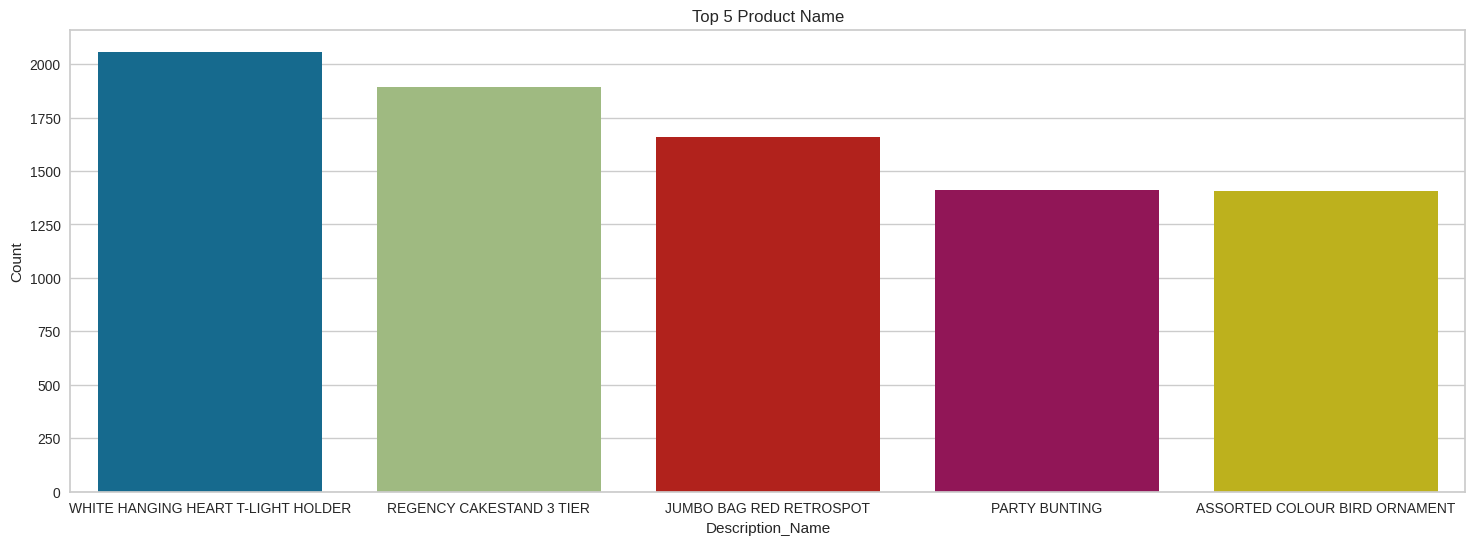

In [24]:
#plot top 5 product name
plt.figure(figsize=(18,6))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])


##### 1. Why did you pick the specific chart?

**I use a barplot to analyze the highest selling product & make visualization**

##### 2. What is/are the insight(s) found from the chart?

##### **I found this highest selling product**
##### **1 WHITE HANGING HEART T-LIGHT HOLDER	2058**
#####**2	REGENCY CAKESTAND 3 TIER	1894**
#####**3	JUMBO BAG RED RETROSPOT	1659**
#####**4	PARTY BUNTING	1409**
#####**5	ASSORTED COLOUR BIRD ORNAMENT**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***It's make positive impact on bussiness for sell.Owner focus on this product due to this high selling of this product***

#### Chart - 2

In [25]:
# Chart - 2 visualization code
StockCode_df=Retail_Shri['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()

StockCode_Name  Count
0         85123A   2065
1          22423   1894
2         85099B   1659
3          47566   1409
4          84879   1405

<Axes: title={'center': 'Top 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

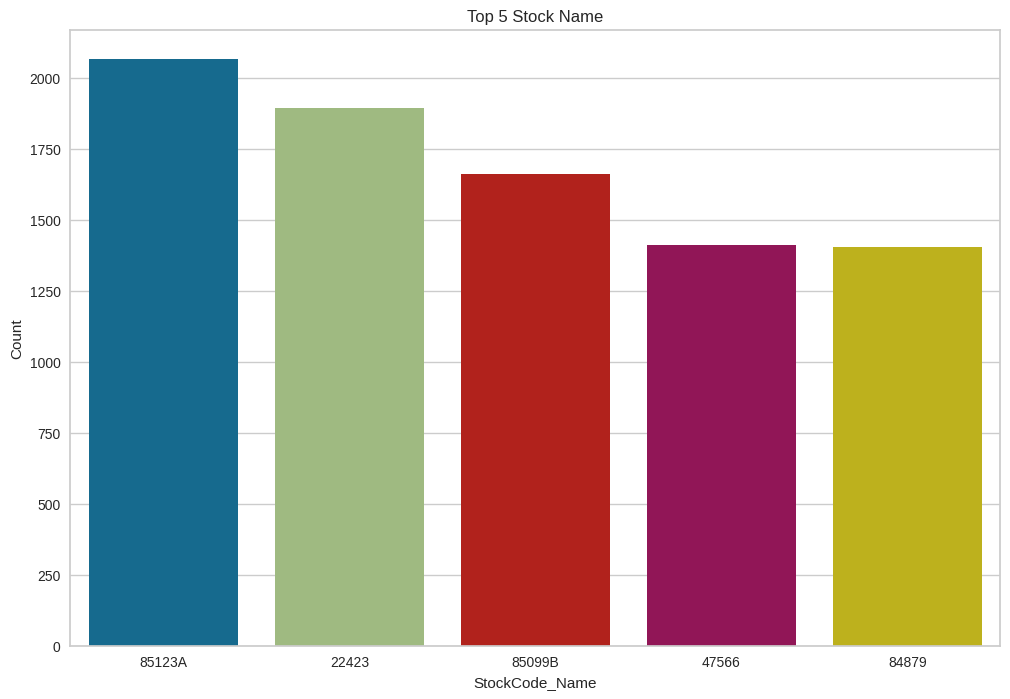

In [26]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

##### 1. Why did you pick the specific chart?

**I use a barplot to analyze the highest selling stockcode & make visualization**

##### 2. What is/are the insight(s) found from the chart?

**I found this highest selling stock code**
##### **1. 85123A**
##### **2. 22432**
##### **3. 85099B**
##### **4.47566**
##### **5.84876**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***It's make positive impact on bussiness for sell.Owner focus on this product due to this high selling Stock Code.***

#### Chart - 3

In [27]:
## Apply groupby function on country and Invoice No.
country_count = Retail_Shri.groupby('Country')['InvoiceNo'].count().reset_index()

In [28]:
country_count.head()

Country  InvoiceNo
0  Australia       1258
1    Austria        401
2    Bahrain         17
3    Belgium       2069
4     Brazil         32

In [29]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_country

Country  InvoiceNo
0  United Kingdom     356728
1         Germany       9480
2          France       8475
3            EIRE       7475
4           Spain       2528
5     Netherlands       2371
6         Belgium       2069
7     Switzerland       1877
8        Portugal       1471
9       Australia       1258

In [30]:
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/Retail_Shri['InvoiceNo'].count()
Top_ten_country

Country  InvoiceNo  Country_percent
0  United Kingdom     356728        88.825809
1         Germany       9480         2.360534
2          France       8475         2.110288
3            EIRE       7475         1.861286
4           Spain       2528         0.629476
5     Netherlands       2371         0.590383
6         Belgium       2069         0.515184
7     Switzerland       1877         0.467376
8        Portugal       1471         0.366281
9       Australia       1258         0.313244

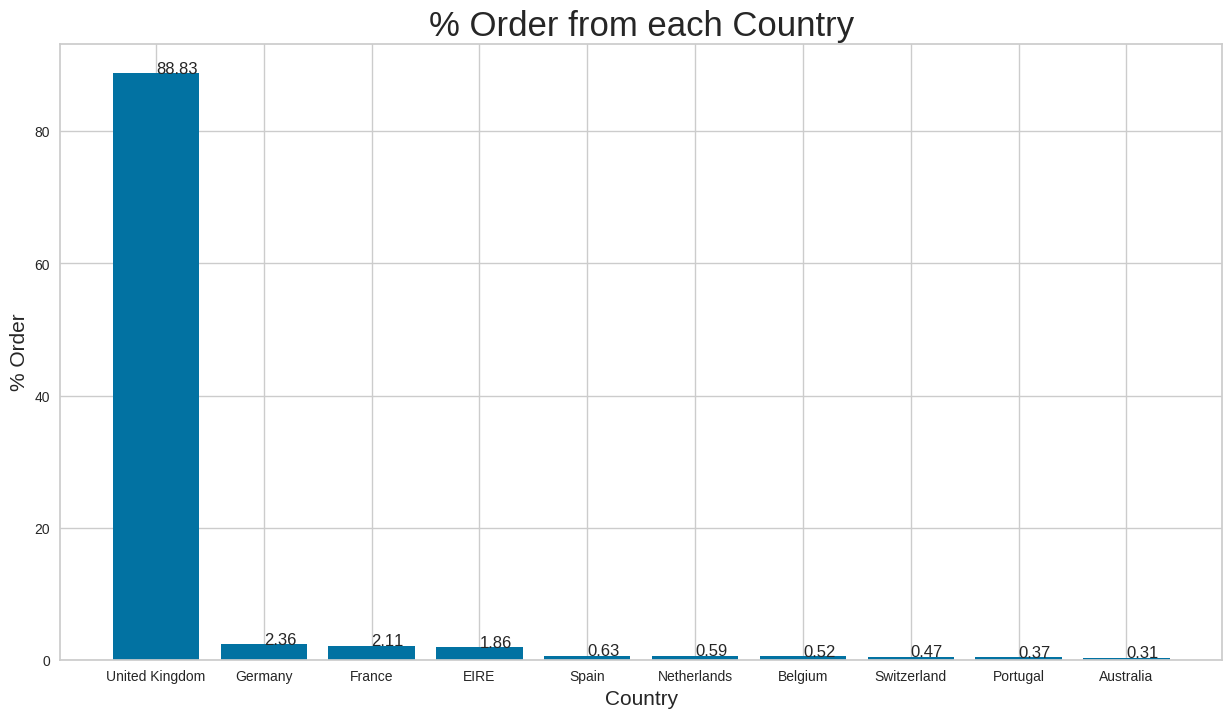

In [31]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=15)
plt.ylabel("% Order", size=15)
plt.title("% Order from each Country", size=25)

## Showing the plot
plt.show()


##### 1. Why did you pick the specific chart?

**I use a barplot to analyze the highest sell of product In which country & make visualization graph**

##### 2. What is/are the insight(s) found from the chart?

**I found insight from this like highest sell of product in United Kingdom**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**It's make positive impact on business & retail shop should be focus in United Kingdom**

#### Chart - 4

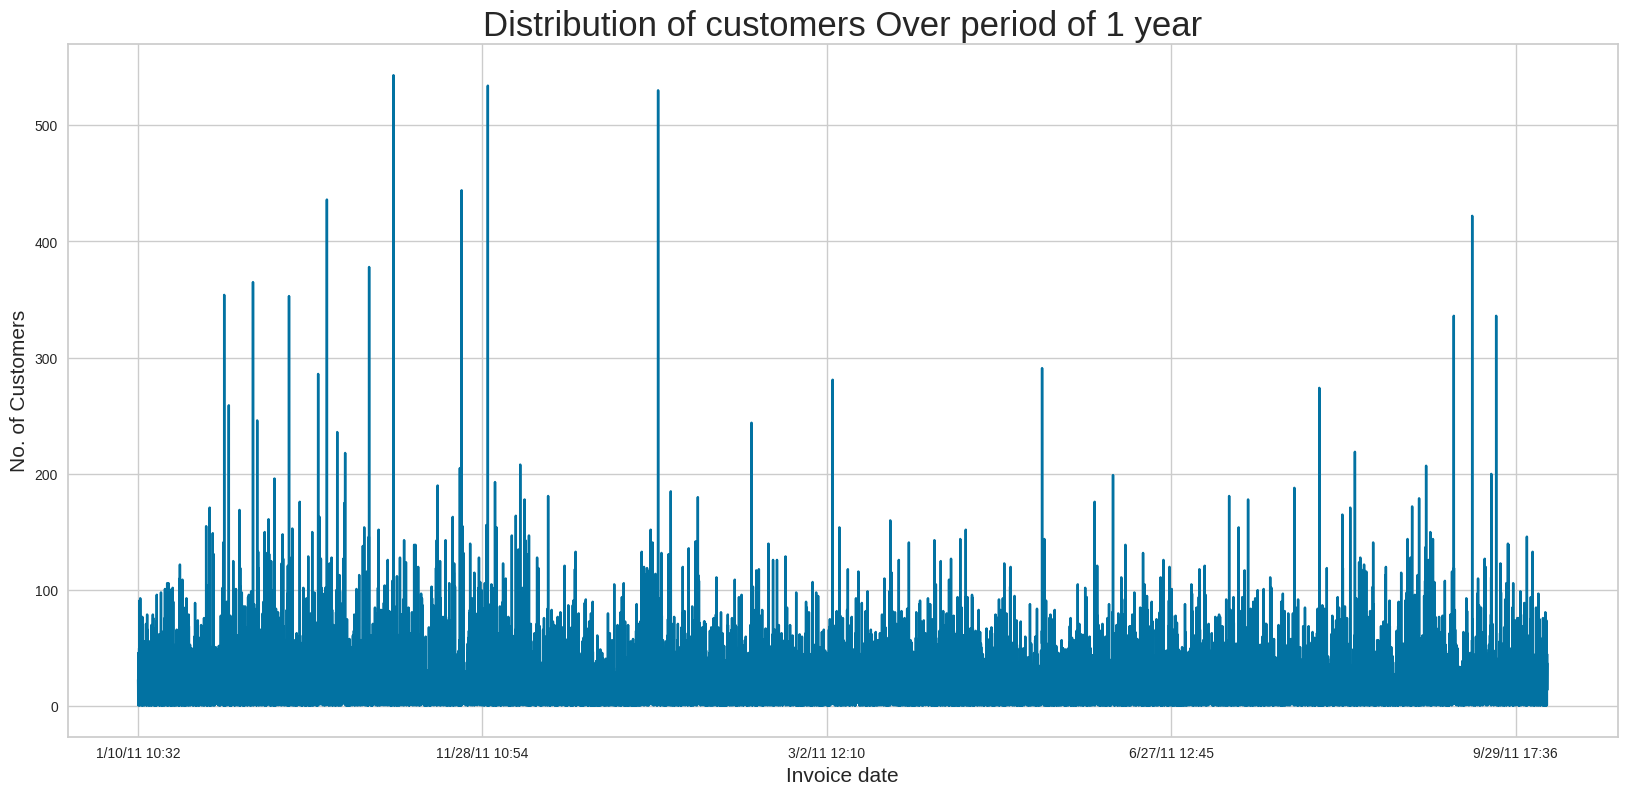

In [32]:
# Chart - 4 visualization code
## customer distribution in 1 year time period
plt.figure(figsize=(20,9))
customer_distribution = Retail_Shri.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

##### 1. Why did you pick the specific chart?

**I use this graph to see distribution of sell over the 1 year of time.**

##### 2. What is/are the insight(s) found from the chart?

**If we observe the graph & analyze the distribution.The distribution of sell is higher in October to December**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**It's positive impact on bussiness & focus in Winter Season.(October to December)**

#### Chart - 5

In [33]:
Retail_Shri['amount'] = Retail_Shri.Quantity*Retail_Shri.UnitPrice

In [34]:
Retail_Shri.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  amount  
0  12/1/10 8:26       2.55     17850.0  United Kingdom   15.30  
1  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34  
2  12/1/10 8:26       2.75     17850.0  United Kingdom   22.00  
3  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34  
4  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34

In [35]:
PercentSales = Retail_Shri.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

CustomerID     amount
0     14646.0  279489.02
1     18102.0  256438.49
2     17450.0  187322.17
3     14911.0  132458.73
4     12415.0  123725.45
5     14156.0  113214.59
6     17511.0   88125.38
7     16684.0   65892.08
8     13694.0   62690.54
9     15311.0   59284.19

<Axes: xlabel='CustomerID', ylabel='amount'>

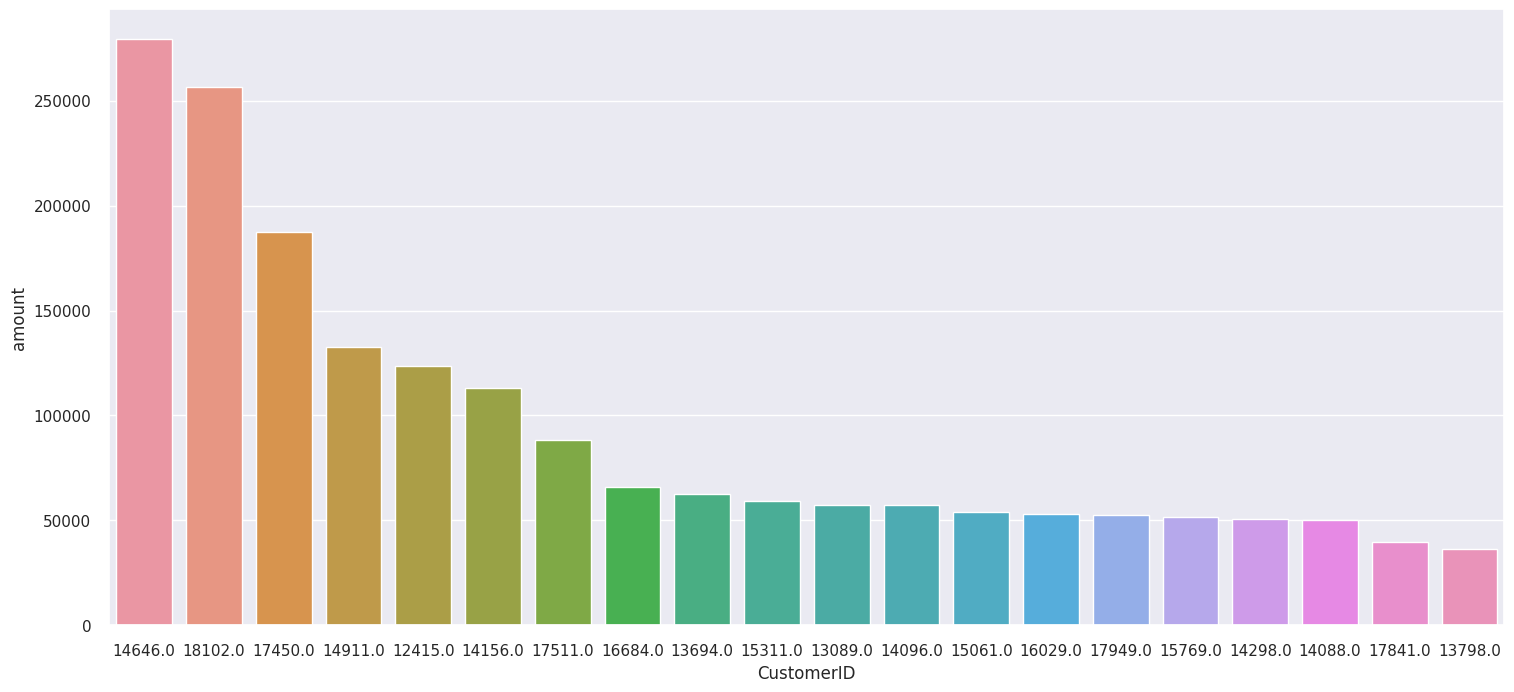

In [36]:
# Chart - 5 visualization code
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])

##### 1. Why did you pick the specific chart?

**I use a barplot to analyze the highest buying customer**

##### 2. What is/are the insight(s) found from the chart?

**I draw a barplot & analyzed.I found some customer which buy more than 10000 Rs. Amount.We are focusing on this customer to buy again**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**It's make positive impact on bussiness to check mindset of customer. Which product like more the customer & customer is satisfied or not**

#### Chart - 6

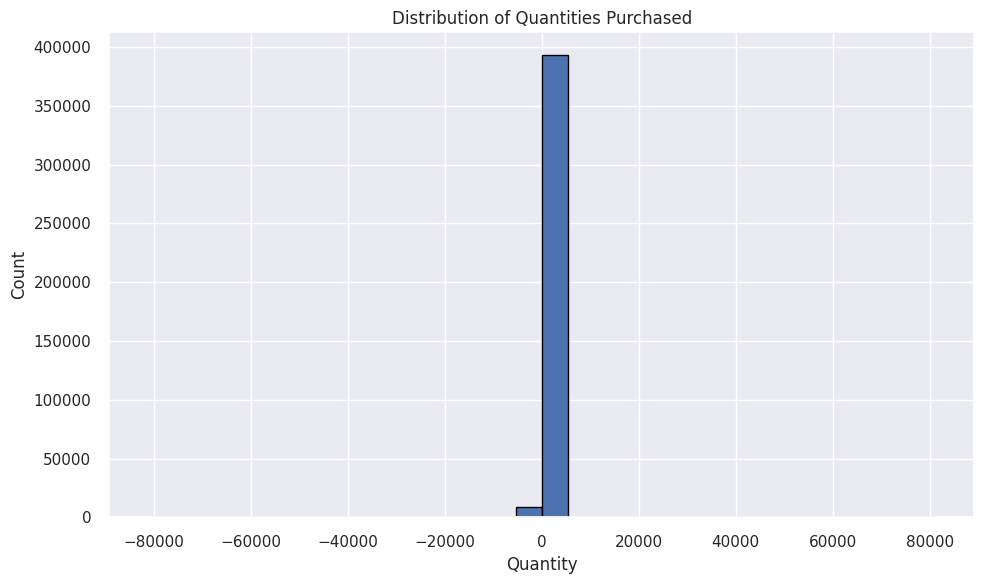

In [37]:
# Chart - 6 visualization code

# Extract the quantity column
quantity = Retail_Shri['Quantity']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting a histogram of the quantity distribution
ax.hist(quantity, bins=30, edgecolor='black')
ax.set_xlabel('Quantity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Quantities Purchased')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**I use this histogram to analyze the quantity of product**

##### 2. What is/are the insight(s) found from the chart?

**I found insights from this graph like highest quantity of product is 5000**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No impact on the bussiness**

#### Chart - 7


**How does the unit price of items vary across different countries?**

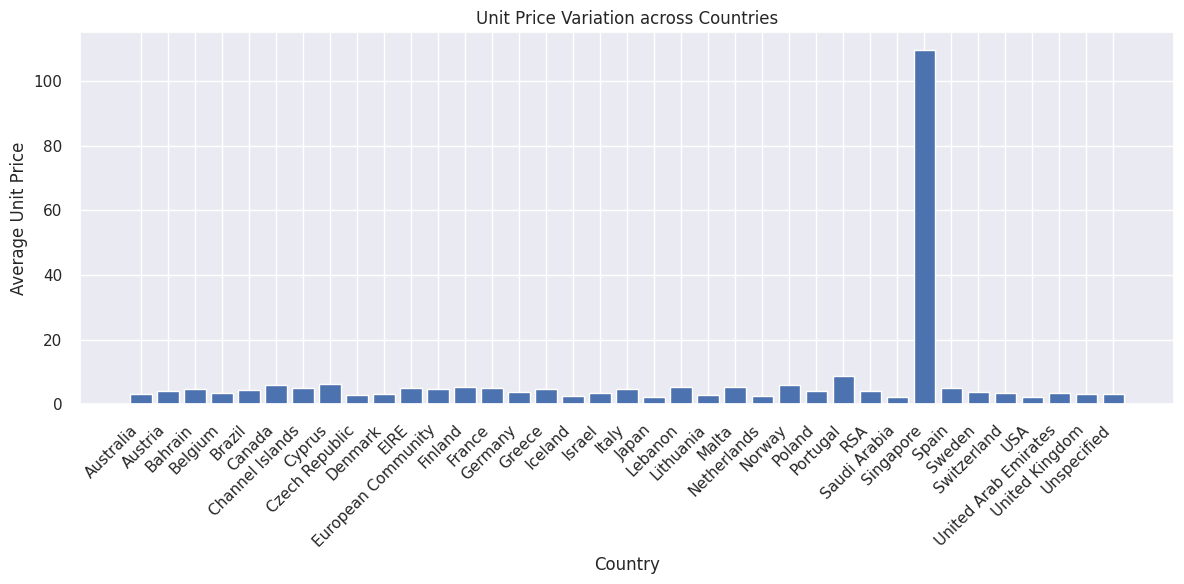

In [38]:
# Chart - 7 visualization code
# Group the data by country and extract the unit prices
country_unit_prices = Retail_Shri.groupby('Country')['UnitPrice'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting a bar chart for unit prices across countries
x = range(len(country_unit_prices))
ax.bar(x, country_unit_prices.values)
ax.set_xticks(x)
ax.set_xticklabels(country_unit_prices.index, rotation=45, ha='right')
ax.set_xlabel('Country')
ax.set_ylabel('Average Unit Price')
ax.set_title('Unit Price Variation across Countries')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**I used this barplot to anlyaze the unit price of product in each country**

##### 2. What is/are the insight(s) found from the chart?

**In Most of the country,unit price is similar but in Singapore unit price is too high**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No impact on bussiness**

#### Chart - 8

**Which countries have the highest and lowest average purchase quantities?**

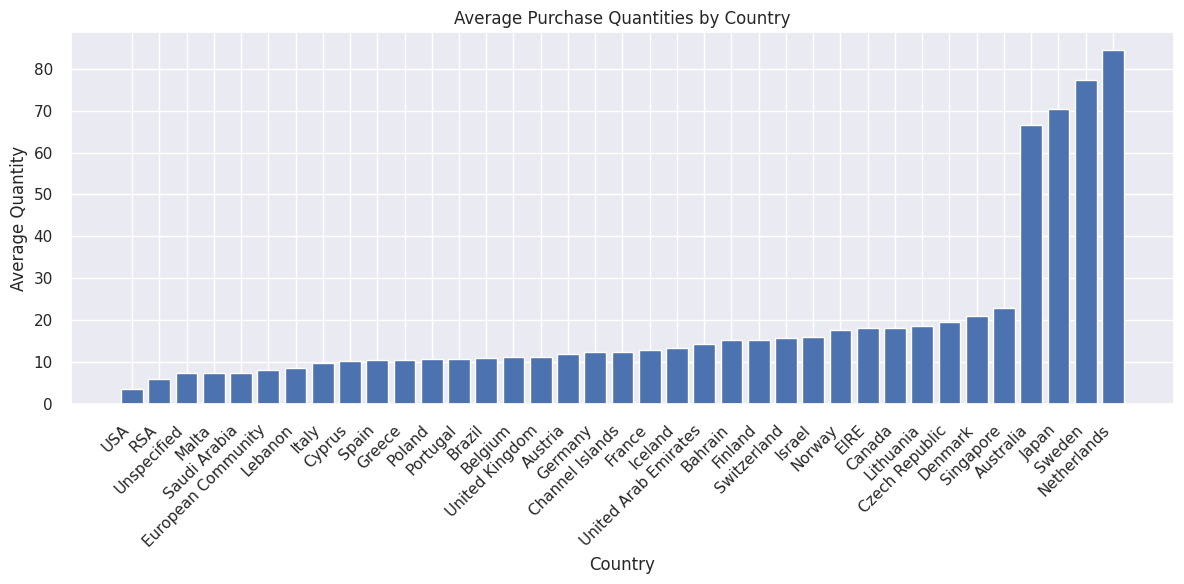

In [39]:
# Chart - 8 visualization code

# Calculate the average purchase quantities per country
country_avg_quantities = Retail_Shri.groupby('Country')['Quantity'].mean()

# Sort the average quantities in ascending order
sorted_avg_quantities = country_avg_quantities.sort_values()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for average quantities
ax.bar(sorted_avg_quantities.index, sorted_avg_quantities.values)
ax.set_xlabel('Country')
ax.set_ylabel('Average Quantity')
ax.set_title('Average Purchase Quantities by Country')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**I use this barplot to analyze the averge quantity of product in each country**

##### 2. What is/are the insight(s) found from the chart?

**I found the insight from this barplot, like the lowest average quantity of purchase in USA, RSA & melta..etc. Highest average quantity purschase australia,japan,sweden & Netherlands**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**It's make a positive impact on bussiness ...to focus more on those country which purchase quantity is to low.**

#### Chart - 9 - Correlation Heatmap

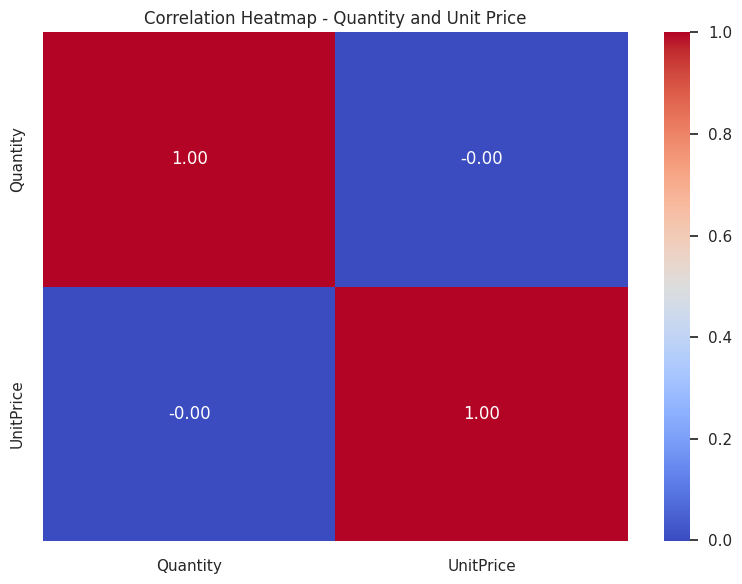

In [40]:
# Correlation Heatmap visualization code
# Select the relevant columns for the heatmap
heatmap_data = Retail_Shri[['Quantity', 'UnitPrice']]

# Calculate the correlation matrix
corr_matrix = heatmap_data.corr()

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap - Quantity and Unit Price")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**I use heatmap to analyze the propotionality of Quantity & Unit Price**

##### 2. What is/are the insight(s) found from the chart?

**I found insight from the heatmap like Quantity is directly propotional to Unit Price**

#### Chart - 10 - Pair Plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs()

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



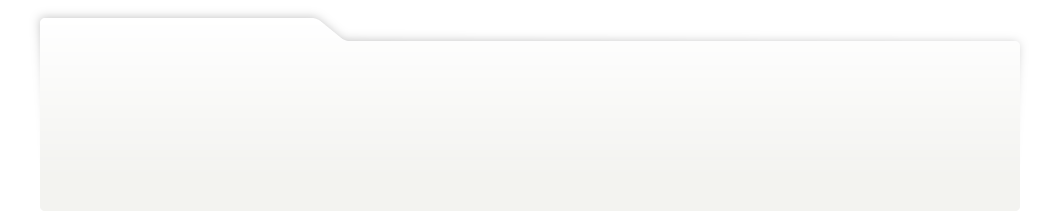
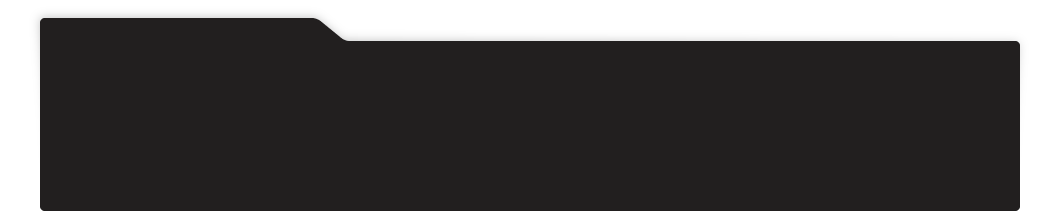
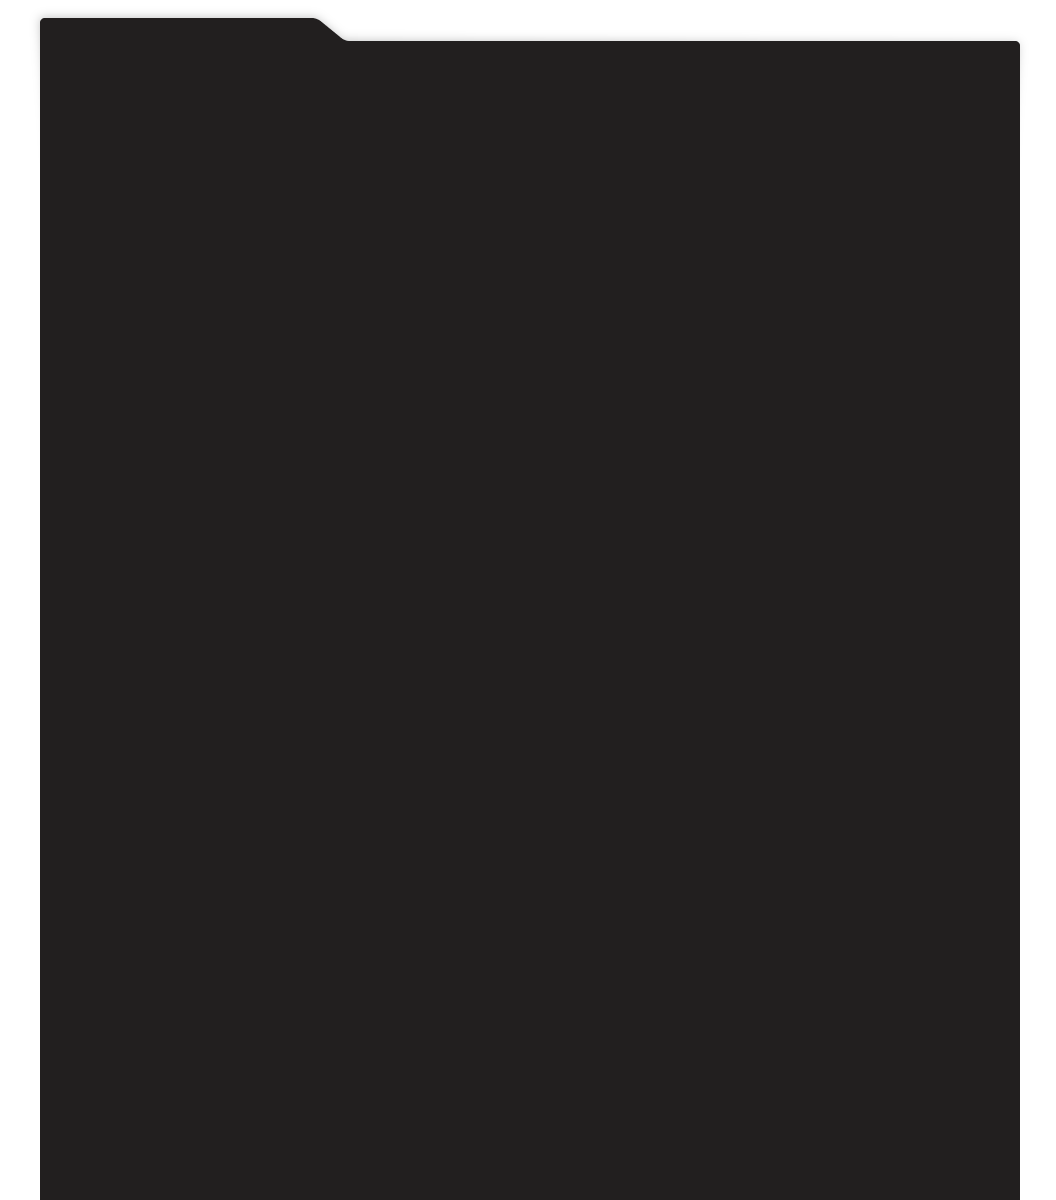
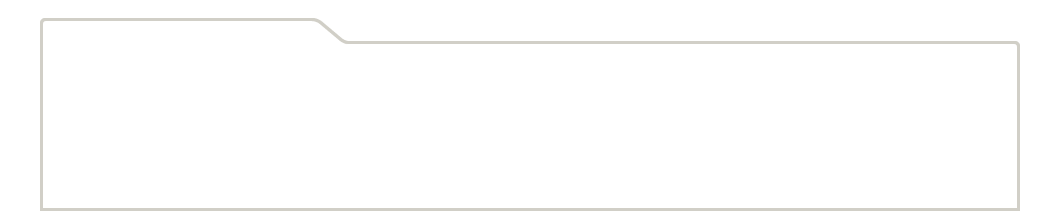
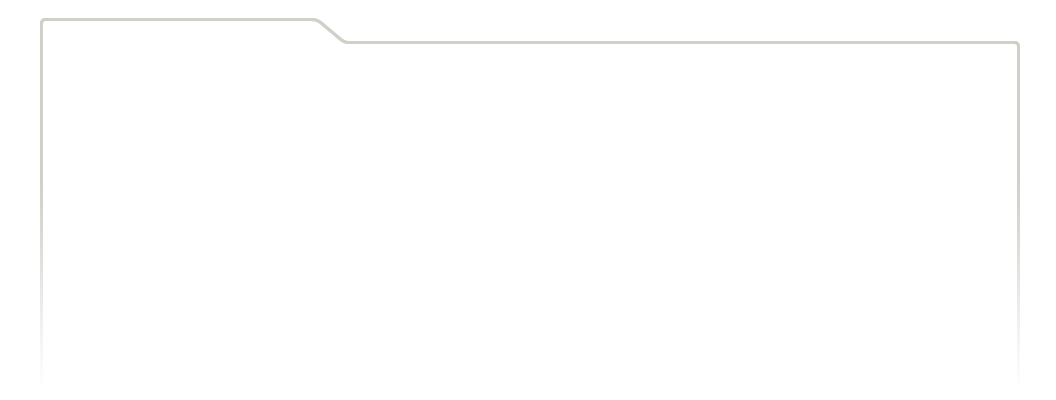
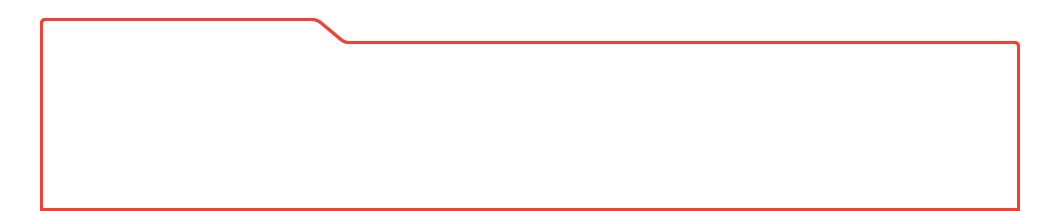
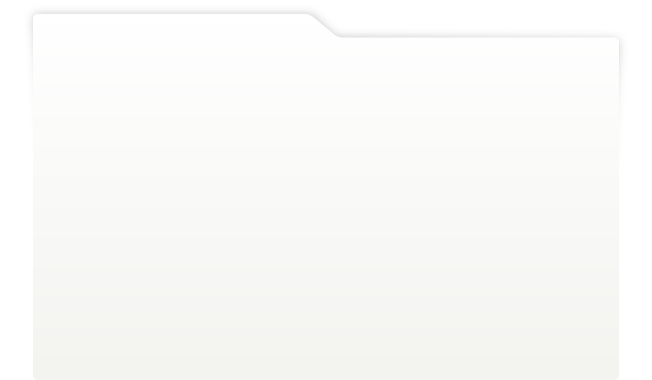
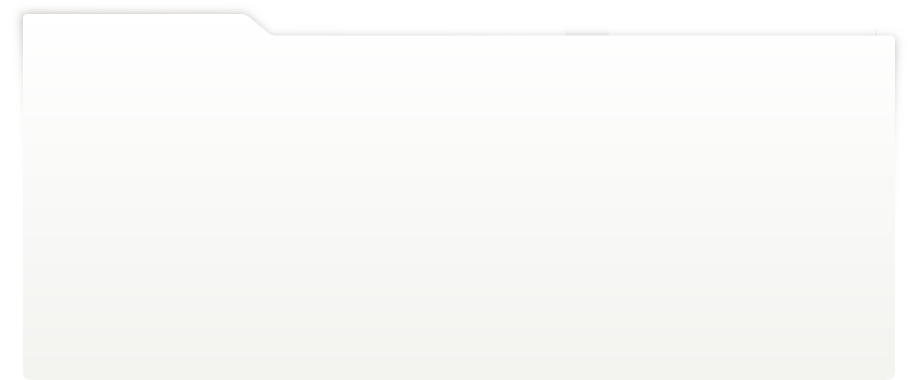
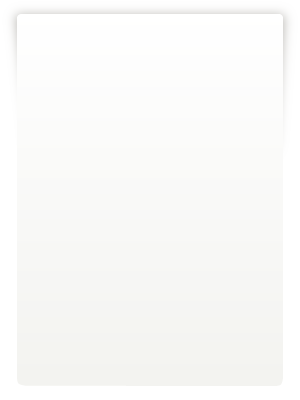
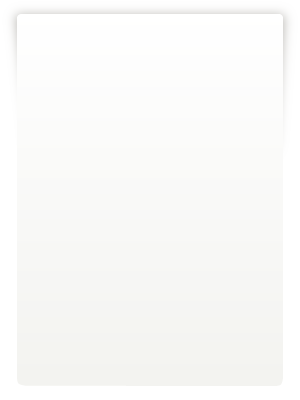
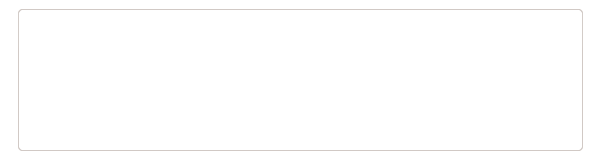
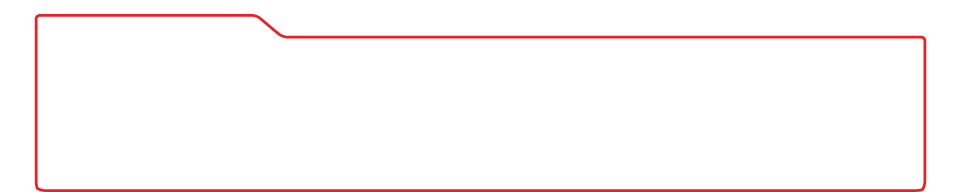
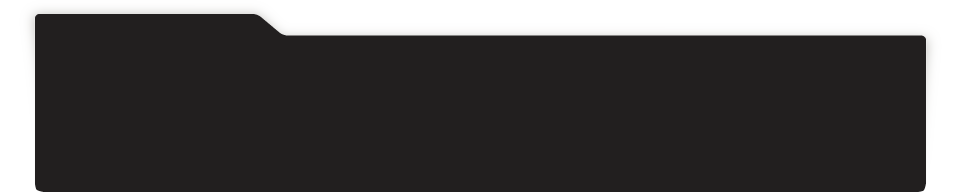
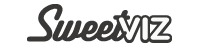
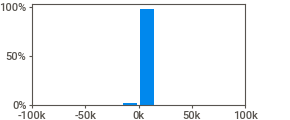
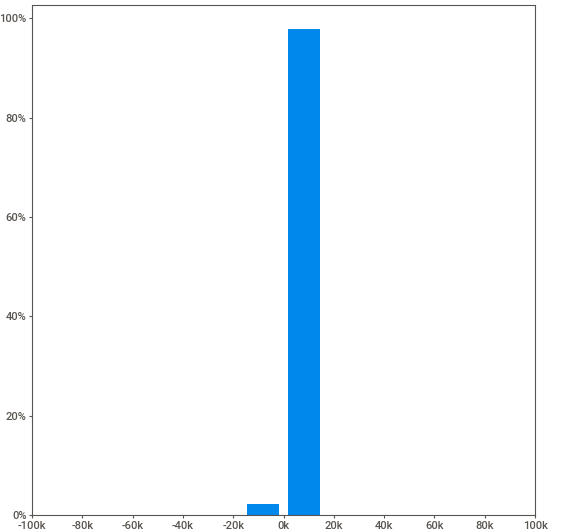
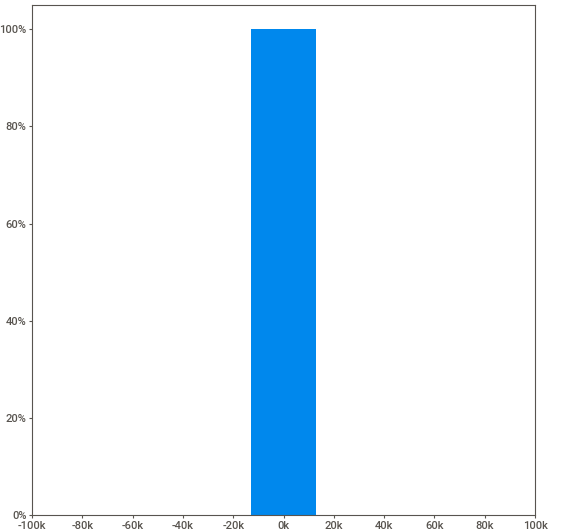
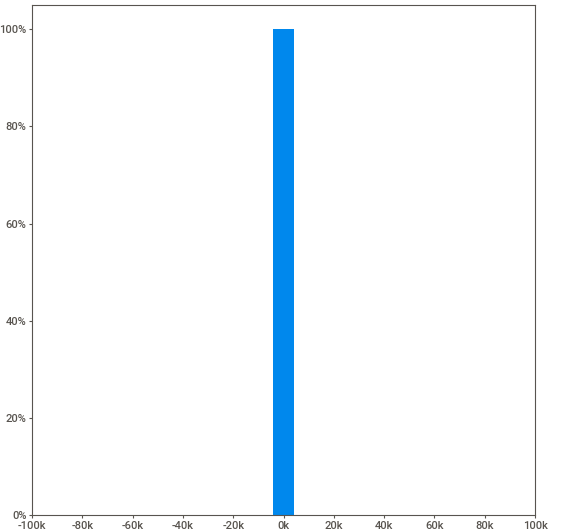
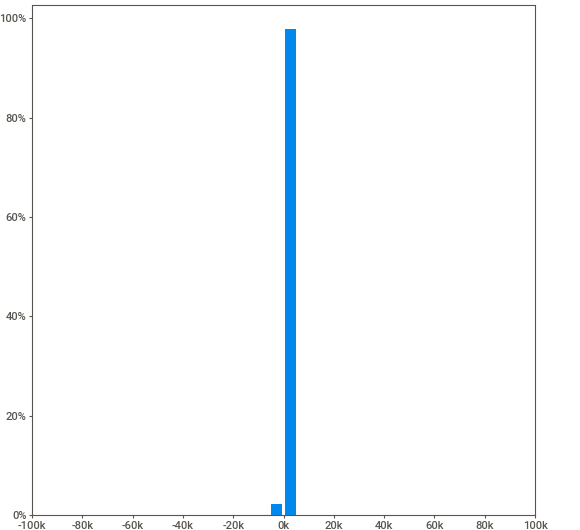
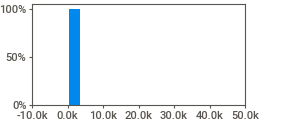
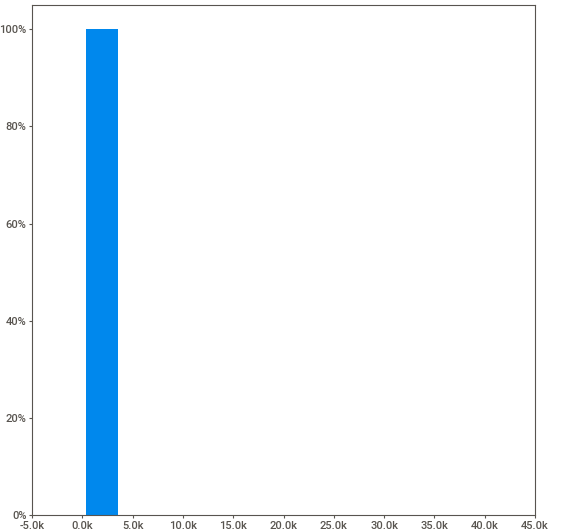
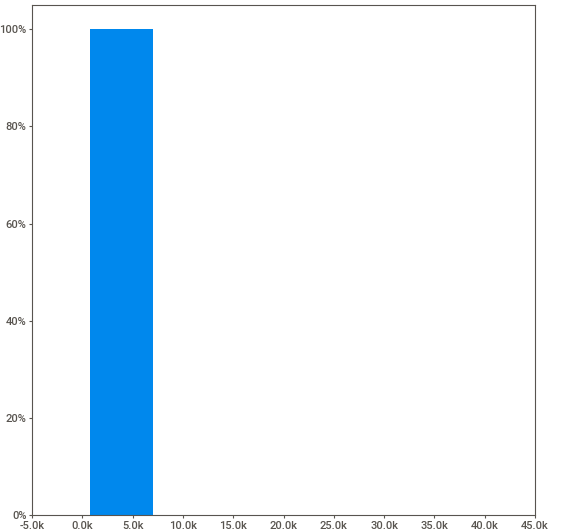
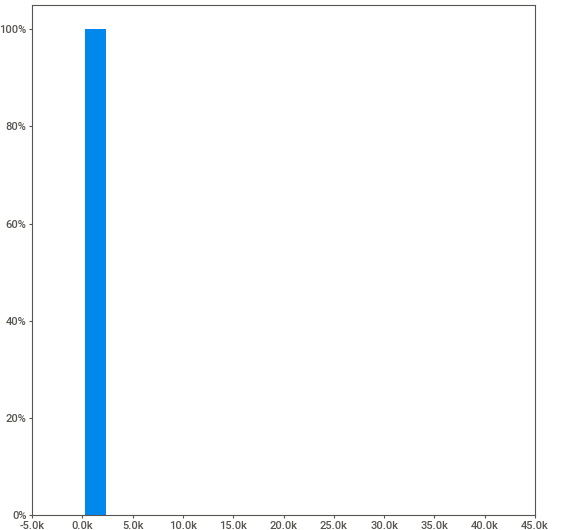
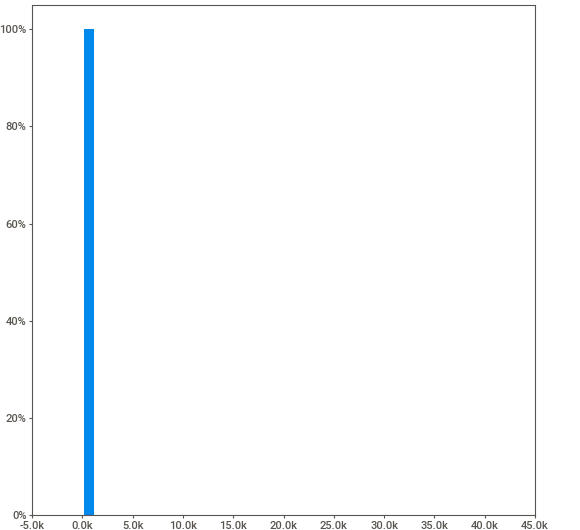
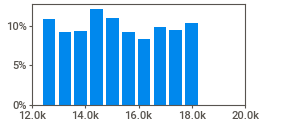
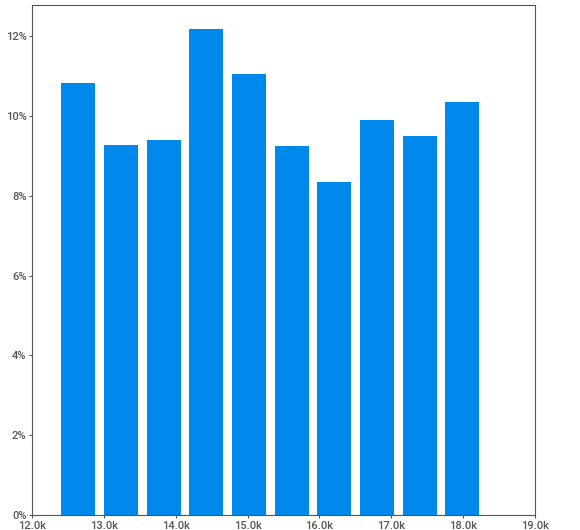
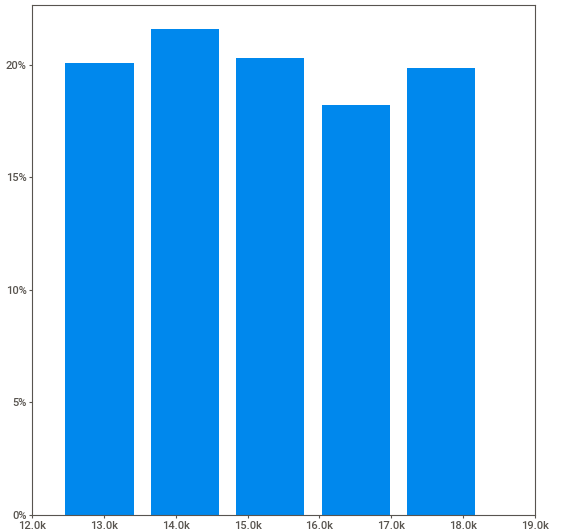
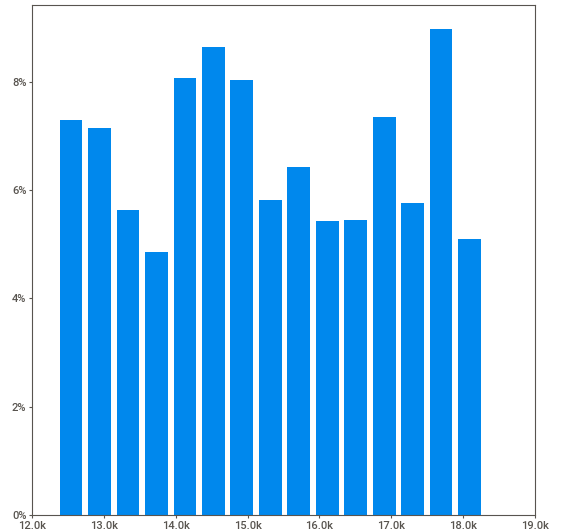
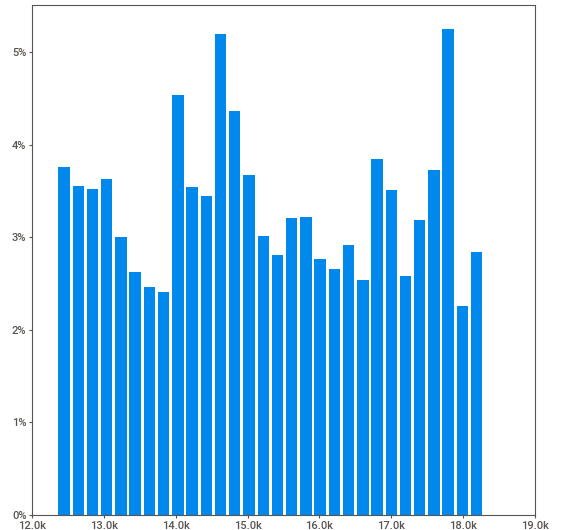
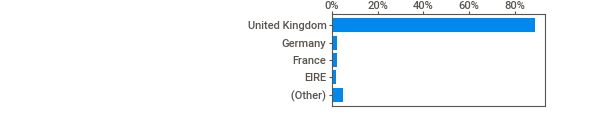
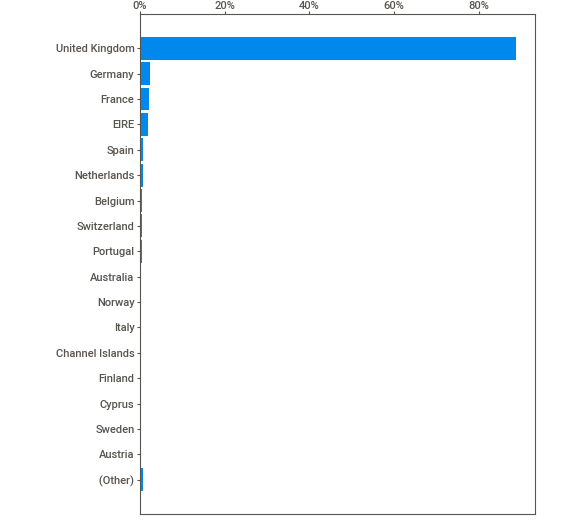
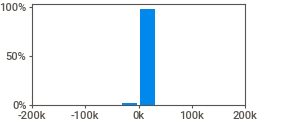
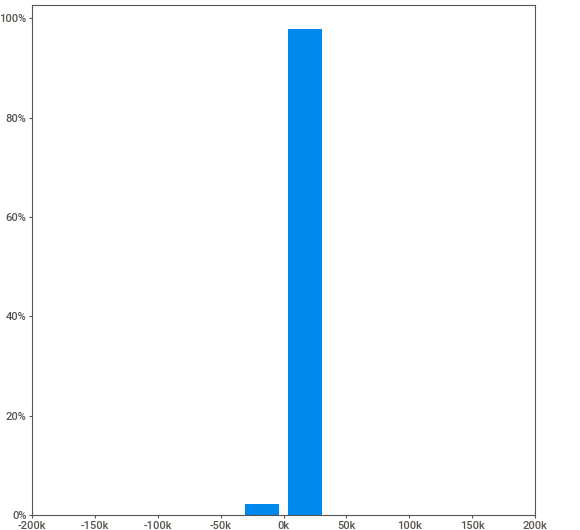
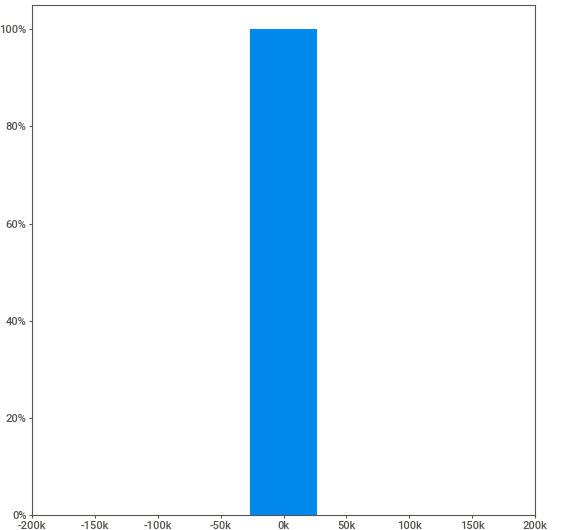
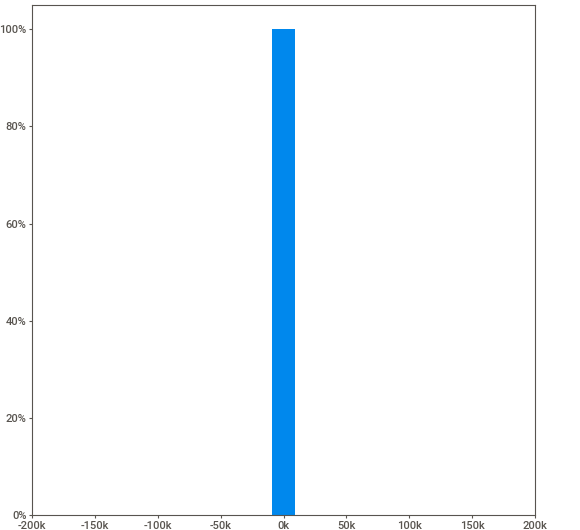
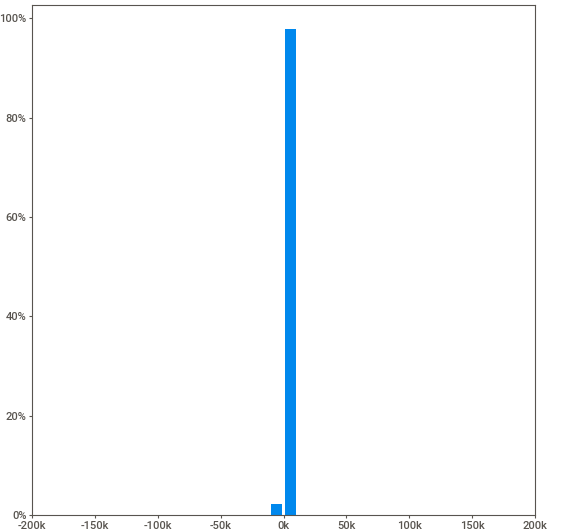
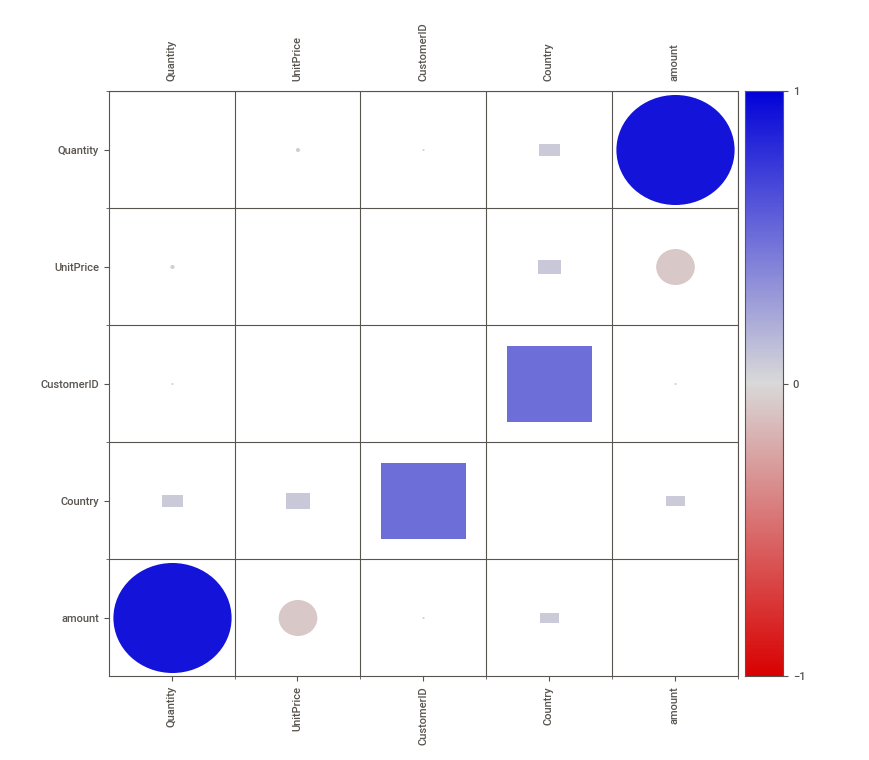
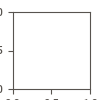

In [41]:
# Pair Plot visualization code
!pip install sweetviz
import sweetviz as sv
report = sv.analyze(Retail_Shri)
report.show_html("sweetviz_report.html")
report.show_notebook()

##### 1. Why did you pick the specific chart?

**I use this sweetviz report to analyze the whole dataset of Online Retail Customer.In sweetviz report,all visualization graph is displayed.**

##### 2. What is/are the insight(s) found from the chart?

**In Sweetviz report, we visualize the whole data & found insights from the dataset**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#### Statement.1:- Customers from the United Kingdom have a higher average purchase quantity compared to customers from Germany.

#### Statement.2:- There is a correlation between the unit price and the quantity of items purchased by customers.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

##### Null Hypothesis (H0): There is no significant difference in the average purchase quantity between customers from the United Kingdom and customers from Germany.
##### Alternative Hypothesis (HA): Customers from the United Kingdom have a higher average purchase quantity compared to customers from Germany.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats


# Select the relevant columns for the analysis
uk_data = Retail_Shri[Retail_Shri['Country'] == 'United Kingdom']
germany_data = Retail_Shri[Retail_Shri['Country'] == 'Germany']

# Perform the statistical test
statistic, p_value = stats.ttest_ind(uk_data['Quantity'], germany_data['Quantity'], equal_var=False)

# Print the p-value
print("P-value:", p_value)

P-value: 0.014066394558549555


##### Which statistical test have you done to obtain P-Value?

**I do the t-test to obtain a P-value**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

##### Null Hypothesis (H0): There is no correlation between the unit price and the quantity of items purchased by customers.
##### Alternative Hypothesis (HA): There is a correlation between the unit price and the quantity of items purchased by customers.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value
# Select the relevant columns for the analysis
unit_price = Retail_Shri['UnitPrice']
quantity = Retail_Shri['Quantity']

# Perform the statistical test
correlation, p_value = stats.pearsonr(unit_price, quantity)

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation)
print("P-value:", p_value)

Correlation Coefficient: -0.0012434674782030447
P-value: 0.43069029053883023


##### Which statistical test have you done to obtain P-Value?

**I do Pearson co-relation coefficent test to obtain P-Value**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation

#Already handled a missing value.

#### What all missing value imputation techniques have you used and why did you use those techniques?

**I already handle the missing value from the dataset**

### 2. Handling Outliers

In [45]:
# Handling Outliers & Outlier treatments
from scipy.stats.mstats import winsorize
# Select the relevant variables for outlier treatment
quantity = Retail_Shri['Quantity']
unit_price = Retail_Shri['UnitPrice']

# Apply Winsorization to handle outliers
winsorized_quantity = winsorize(quantity, limits=[0.05, 0.05])  # Winsorize 5% from both tails
winsorized_unit_price = winsorize(unit_price, limits=[0.05, 0.05])  # Winsorize 5% from both tails

# Replace the original variables with the winsorized values
Retail_Shri['Winsorized_Quantity'] = winsorized_quantity
Retail_Shri['Winsorized_UnitPrice'] = winsorized_unit_price

# Print the summary statistics of the winsorized variables
print("Winsorized Quantity:")
print(Retail_Shri['Winsorized_Quantity'].describe())
print("\nWinsorized Unit Price:")
print(Retail_Shri['Winsorized_UnitPrice'].describe())

Winsorized Quantity:
count    401604.000000
mean          8.775336
std           9.511349
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          36.000000
Name: Winsorized_Quantity, dtype: float64

Winsorized Unit Price:
count    401604.000000
mean          2.701921
std           2.294582
min           0.420000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.500000
Name: Winsorized_UnitPrice, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [46]:
Retail_Shri.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

Quantity      UnitPrice     CustomerID         amount  \
count  401604.000000  401604.000000  401604.000000  401604.000000   
mean       12.183273       3.474064   15281.160818      20.613638   
std       250.283037      69.764035    1714.006089     430.352218   
min    -80995.000000       0.000000   12346.000000 -168469.600000   
25%         2.000000       1.250000   13939.000000       4.250000   
50%         5.000000       1.950000   15145.000000      11.700000   
75%        12.000000       3.750000   16784.000000      19.800000   
max     80995.000000   38970.000000   18287.000000  168469.600000   

       Winsorized_Quantity  Winsorized_UnitPrice  
count        401604.000000         401604.000000  
mean              8.775336              2.701921  
std               9.511349              2.294582  
min               1.000000              0.420000  
25%               2.000000              1.250000  
50%               5.000000              1.950000  
75%              12.000000              3.750000  
max              36.000000              8.500000

##### What all outlier treatment techniques have you used and why did you use those techniques?

**we use the winsorize function from scipy.stats.mstats module to apply Winsorization to the 'Quantity' and 'UnitPrice' columns. We set the limits parameter to [0.05, 0.05], which means that the top 5% and bottom 5% of values will be replaced with the corresponding percentiles. The winsorized values are then assigned to new columns in the DataFrame.**

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Country']
categorical_transformer = OneHotEncoder(sparse=False)
encoded_features = categorical_transformer.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=categorical_transformer.get_feature_names_out(categorical_features))

Retail_Shri.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  amount  \
0  12/1/10 8:26       2.55     17850.0  United Kingdom   15.30   
1  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   
2  12/1/10 8:26       2.75     17850.0  United Kingdom   22.00   
3  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   
4  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   

   Winsorized_Quantity  Winsorized_UnitPrice  
0                    6                  2.55  
1                    6                  3.39  
2                    8                  2.75  
3                    6                  3.39  
4                    6                  3.39

### It's not textual dataset, So no need to do Texual Data Processing

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features
# Select the relevant columns for feature manipulation
selected_columns = ['Quantity', 'UnitPrice', 'Country','InvoiceDate']
Retail_Shri['TotalPrice'] = data['Quantity'] * data['UnitPrice']
Retail_Shri.reset_index(inplace=True ,drop=True)
Retail_Shri.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  amount  \
0  12/1/10 8:26       2.55     17850.0  United Kingdom   15.30   
1  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   
2  12/1/10 8:26       2.75     17850.0  United Kingdom   22.00   
3  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   
4  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   

   Winsorized_Quantity  Winsorized_UnitPrice  TotalPrice  
0                    6                  2.55       15.30  
1                    6                  3.39       20.34  
2                    8                  2.75       22.00  
3                    6                  3.39       20.34  
4                    6                  3.39       20.34

In [60]:
Retail_Shri.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  amount  \
0  12/1/10 8:26       2.55     17850.0  United Kingdom   15.30   
1  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   
2  12/1/10 8:26       2.75     17850.0  United Kingdom   22.00   
3  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   
4  12/1/10 8:26       3.39     17850.0  United Kingdom   20.34   

   Winsorized_Quantity  Winsorized_UnitPrice  TotalPrice  
0                    6                  2.55       15.30  
1                    6                  3.39       20.34  
2                    8                  2.75       22.00  
3                    6                  3.39       20.34  
4                    6                  3.39       20.34

#### 2. Feature Selection

In [61]:
# Select your features wisely to avoid overfitting
# Select the desired features
Retail_Shri.reset_index(inplace=True ,drop=True)
selected_features = ['CustomerID','InvoiceDate','Description', 'Country', 'Winsorized_Quantity','Winsorized_UnitPrice', 'TotalPrice','InvoiceNo']
Retail_Shri = Retail_Shri[selected_features]

Retail_Shri.head()

CustomerID   InvoiceDate                          Description  \
0     17850.0  12/1/10 8:26   WHITE HANGING HEART T-LIGHT HOLDER   
1     17850.0  12/1/10 8:26                  WHITE METAL LANTERN   
2     17850.0  12/1/10 8:26       CREAM CUPID HEARTS COAT HANGER   
3     17850.0  12/1/10 8:26  KNITTED UNION FLAG HOT WATER BOTTLE   
4     17850.0  12/1/10 8:26       RED WOOLLY HOTTIE WHITE HEART.   

          Country  Winsorized_Quantity  Winsorized_UnitPrice  TotalPrice  \
0  United Kingdom                    6                  2.55       15.30   
1  United Kingdom                    6                  3.39       20.34   
2  United Kingdom                    8                  2.75       22.00   
3  United Kingdom                    6                  3.39       20.34   
4  United Kingdom                    6                  3.39       20.34   

  InvoiceNo  
0    536365  
1    536365  
2    536365  
3    536365  
4    536365

In [62]:
Retail_Shri.columns

Index(['CustomerID', 'InvoiceDate', 'Description', 'Country',
       'Winsorized_Quantity', 'Winsorized_UnitPrice', 'TotalPrice',
       'InvoiceNo'],
      dtype='object')

##### What all feature selection methods have you used  and why?

**I used a different feature selection method like Demographic, psychographic, behavioral and geographic segmentation**

##### Which all features you found important and why?

**I selected the above columns as input to your model & based on this feature.I build model for Online Retail Customer Segmentation.**

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [63]:
# Transform Your data

# No need to do Data Transformation.

### 6. Data Scaling

In [64]:
# Scaling your data

#No need to do data Scaling

##### Which method have you used to scale you data and why?

**No need to do data scaling**

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [65]:
# Dimensionality Reduction (If needed)

#No need to reduce dimension.

In [66]:
Retail_Shri.head()

CustomerID   InvoiceDate                          Description  \
0     17850.0  12/1/10 8:26   WHITE HANGING HEART T-LIGHT HOLDER   
1     17850.0  12/1/10 8:26                  WHITE METAL LANTERN   
2     17850.0  12/1/10 8:26       CREAM CUPID HEARTS COAT HANGER   
3     17850.0  12/1/10 8:26  KNITTED UNION FLAG HOT WATER BOTTLE   
4     17850.0  12/1/10 8:26       RED WOOLLY HOTTIE WHITE HEART.   

          Country  Winsorized_Quantity  Winsorized_UnitPrice  TotalPrice  \
0  United Kingdom                    6                  2.55       15.30   
1  United Kingdom                    6                  3.39       20.34   
2  United Kingdom                    8                  2.75       22.00   
3  United Kingdom                    6                  3.39       20.34   
4  United Kingdom                    6                  3.39       20.34   

  InvoiceNo  
0    536365  
1    536365  
2    536365  
3    536365  
4    536365

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**No need to reduce dimension of dataset**

### 8. Data Splitting

In [67]:
Retail_Shri.head()

CustomerID   InvoiceDate                          Description  \
0     17850.0  12/1/10 8:26   WHITE HANGING HEART T-LIGHT HOLDER   
1     17850.0  12/1/10 8:26                  WHITE METAL LANTERN   
2     17850.0  12/1/10 8:26       CREAM CUPID HEARTS COAT HANGER   
3     17850.0  12/1/10 8:26  KNITTED UNION FLAG HOT WATER BOTTLE   
4     17850.0  12/1/10 8:26       RED WOOLLY HOTTIE WHITE HEART.   

          Country  Winsorized_Quantity  Winsorized_UnitPrice  TotalPrice  \
0  United Kingdom                    6                  2.55       15.30   
1  United Kingdom                    6                  3.39       20.34   
2  United Kingdom                    8                  2.75       22.00   
3  United Kingdom                    6                  3.39       20.34   
4  United Kingdom                    6                  3.39       20.34   

  InvoiceNo  
0    536365  
1    536365  
2    536365  
3    536365  
4    536365

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

# Select the features and target variable
selected_features = ['InvoiceDate','Description', 'Country', 'Winsorized_Quantity', 'Winsorized_UnitPrice', 'TotalPrice']
target_variable = ['InvoiceNo']

X = Retail_Shri[selected_features]
y = Retail_Shri[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (321283, 6) (321283, 1)
Testing set shape: (80321, 6) (80321, 1)


##### What data splitting ratio have you used and why?

**I used

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [69]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# 10.RFM model (Recency, Frequency,Monetary value)

### **RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.**

**RFM stands for the three dimensions:**

### **Recency – How recently did the customer purchase?**

### **Frequency – How often do they purchase?**

### **Monetary – How much do they spend?**

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [70]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
import datetime as dt

# Set Latest date 2011-12-10 as the last invoice date was 2011-12-09. This is to calculate the number of days from the recent purchase
Latest_Date = dt.datetime(2011, 12, 10)

# Convert 'InvoiceDate' column to datetime format
Retail_Shri['InvoiceDate'] = pd.to_datetime(Retail_Shri['InvoiceDate'])

# Create RFM Modelling scores for each customer
rfm_df = Retail_Shri.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency, and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [71]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4372.000000
mean       91.581199
std       100.772139
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

<ipython-input-72-60458b153614>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r');


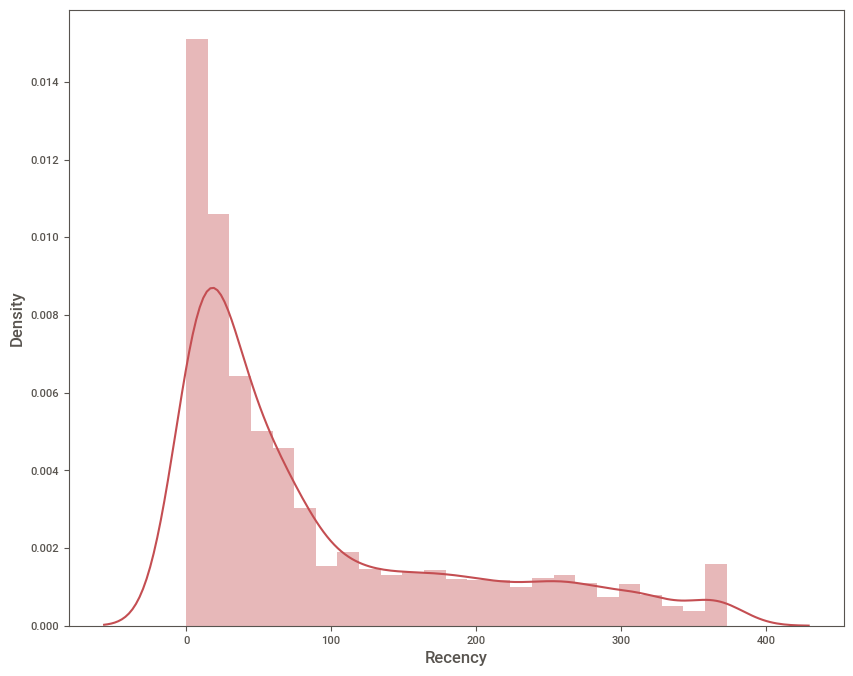

In [72]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [73]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4372.000000
mean       91.858188
std       229.223566
min         1.000000
25%        17.000000
50%        41.000000
75%        99.250000
max      7812.000000
Name: Frequency, dtype: float64

<ipython-input-74-79cafdf20133>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r');


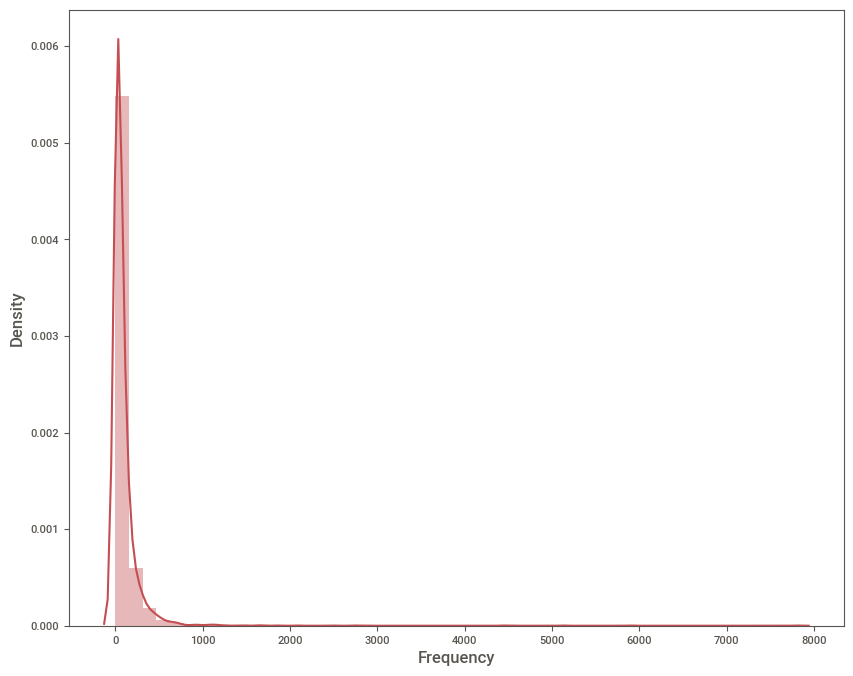

In [74]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [75]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4372.000000
mean       2032.755923
std        8952.025481
min           0.000000
25%         302.175000
50%         659.435000
75%        1647.315000
max      280206.020000
Name: Monetary, dtype: float64

<ipython-input-76-73d6b64a176d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r')


<Axes: xlabel='Monetary', ylabel='Density'>

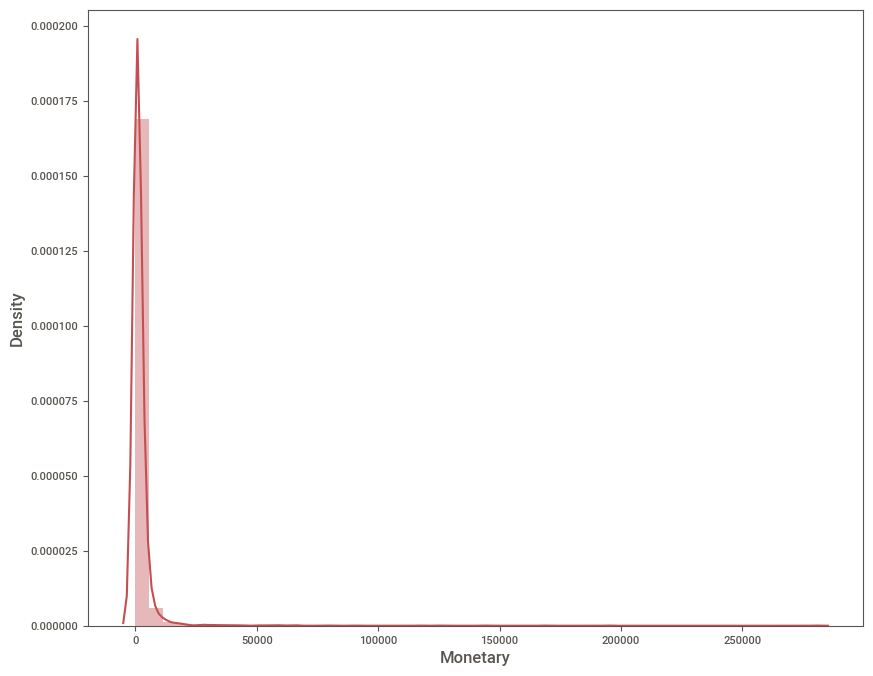

In [76]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

***From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.***

## **Splitting into four segments using quantiles.**

In [77]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [78]:
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 302.17500000000007, 0.5: 659.435, 0.75: 1647.315}}

In [79]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [80]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          2  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [81]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          2  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [82]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<ipython-input-83-3281d3909497>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Recency_Plot,color='r');


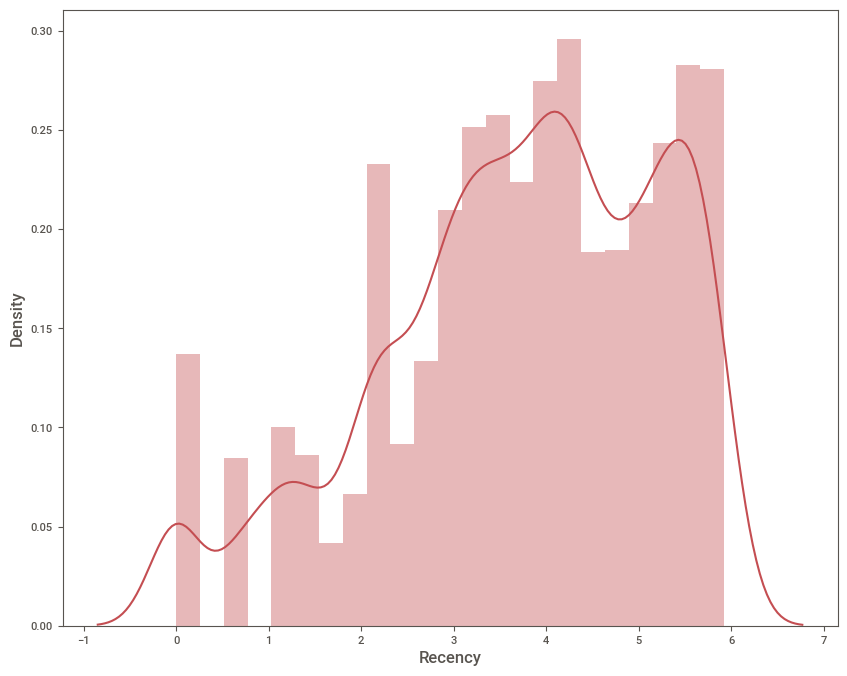

In [83]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

<ipython-input-84-4c588baf2cf7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Frequency_Plot,color='r');


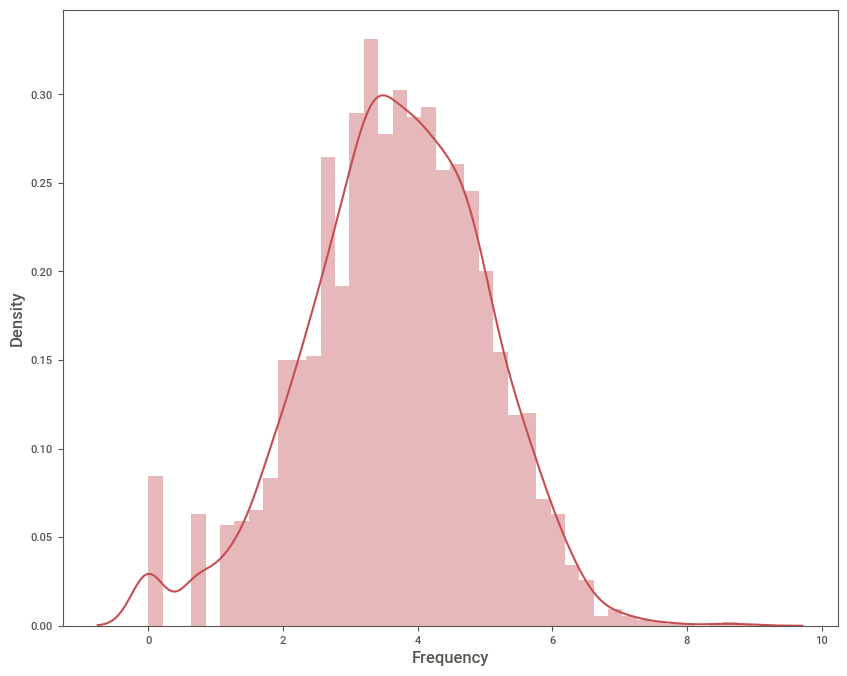

In [84]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

<ipython-input-85-305ed1b0bee2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Monetary_Plot,color='r');


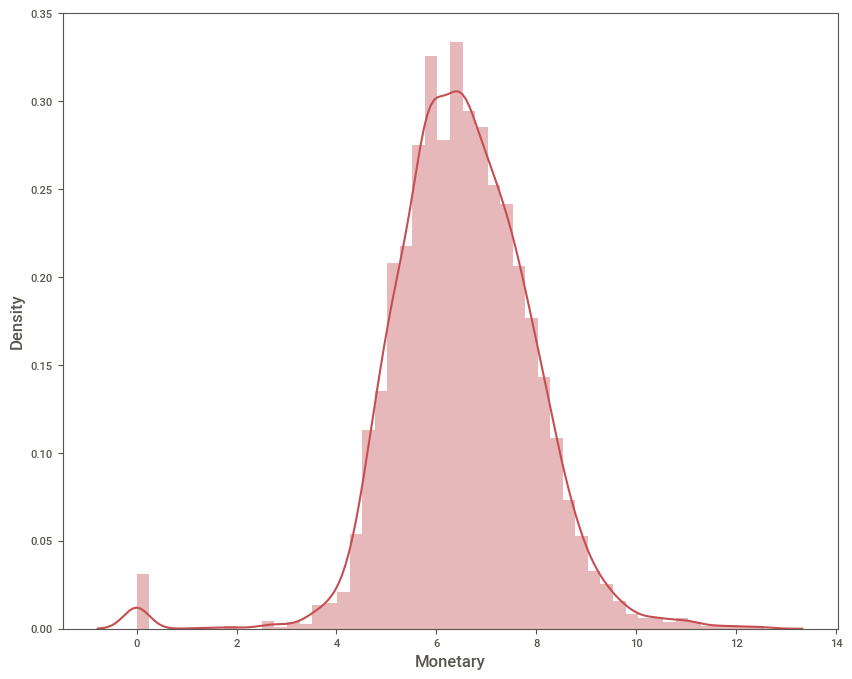

In [85]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

***As we can see from the above plots, skewness has been removed from the data.***



In [86]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

## ***7. ML Model Implementation***

### ML Model - Clustering

**Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.**

**KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method  can be used. These methods will help in selection of the optimum number of clusters.**

In [87]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

### **Silhouette score method:**

**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.**

## **Applying Silhouette Score Method on Recency and Monetary**

In [88]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.41578877510235773


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.3410580231854598


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.35093185289751216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.3732892138429951


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.3549135182078406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.3472768691220255


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.3563833375759083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.33948316336596185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.3503991904619341


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.35140006763679327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, silhouette score is 0.34037311657004216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, silhouette score is 0.3478941293551275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, silhouette score is 0.3432741978952265


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15, silhouette score is 0.3363530367427217


### **Elbow Method:**

**Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.**

## **Applying Elbow Method on Recency and Monetary**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

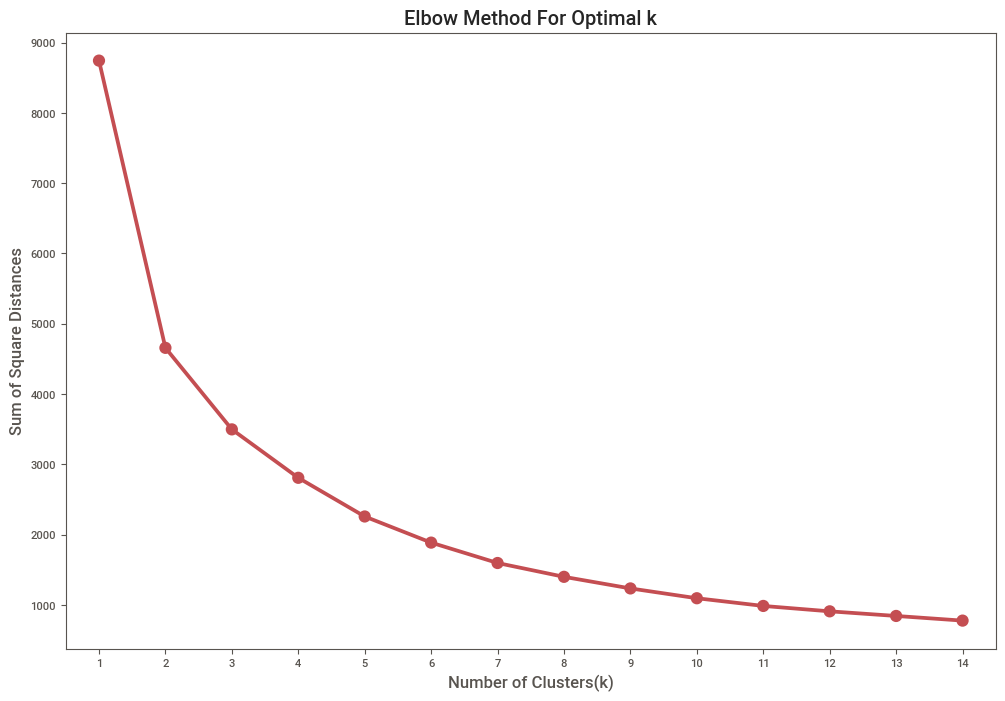

In [89]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


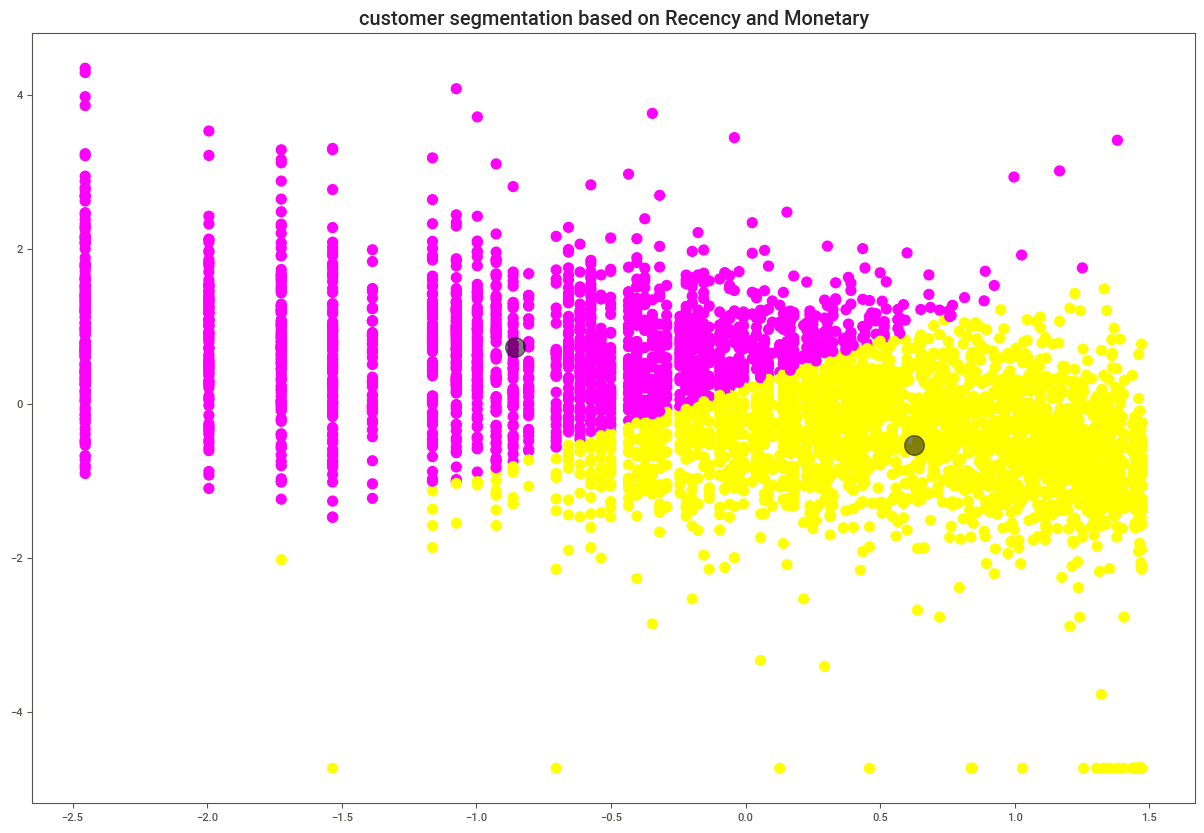

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.***

### **DBSCAN Clustering:**

**DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.**

## **Applying DBSCAN on Recency and Monetary**

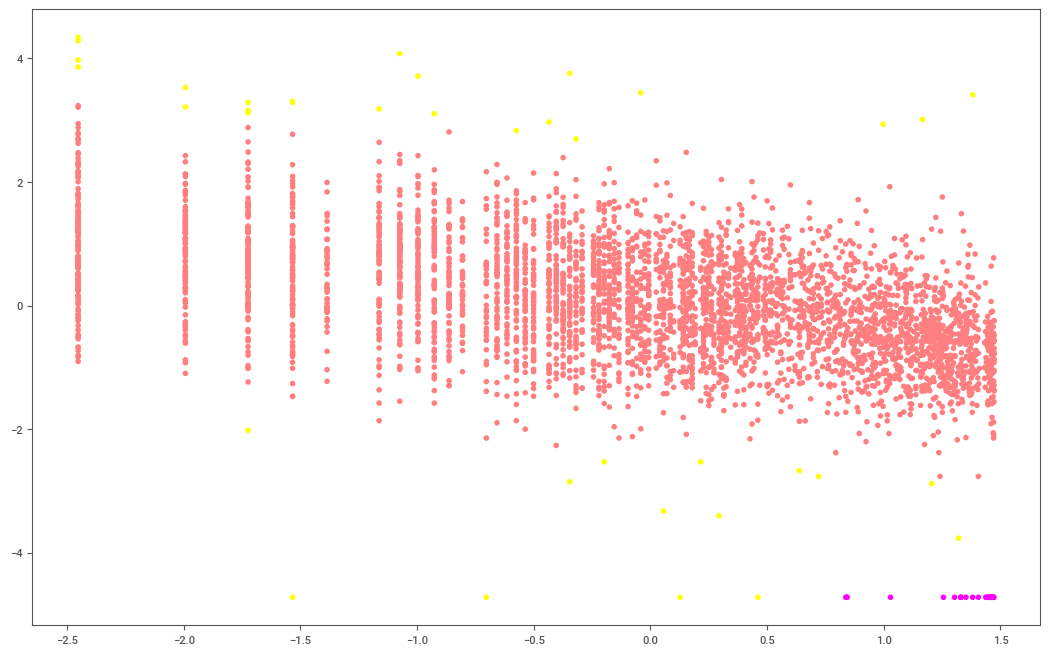

In [91]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

♦ ***Here we can see that, Customers are separated when we cluster them by Recency and Monetary.***

## **Applying silhouette Score Method on Frquency and Monetary**

In [92]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.47143942108330067


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.41211179698525446


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.38628754683679284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.3754992816953155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.3515729758735608


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.3660813033698877


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.348685728068466


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.32616968935434304


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.3521330136242307


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.3597099690529909


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, silhouette score is 0.34624398097841486


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, silhouette score is 0.35703369232706544


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, silhouette score is 0.36624221196537915


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15, silhouette score is 0.37313463812327186


### **Applying Elbow Method on Frequency and Monetary**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

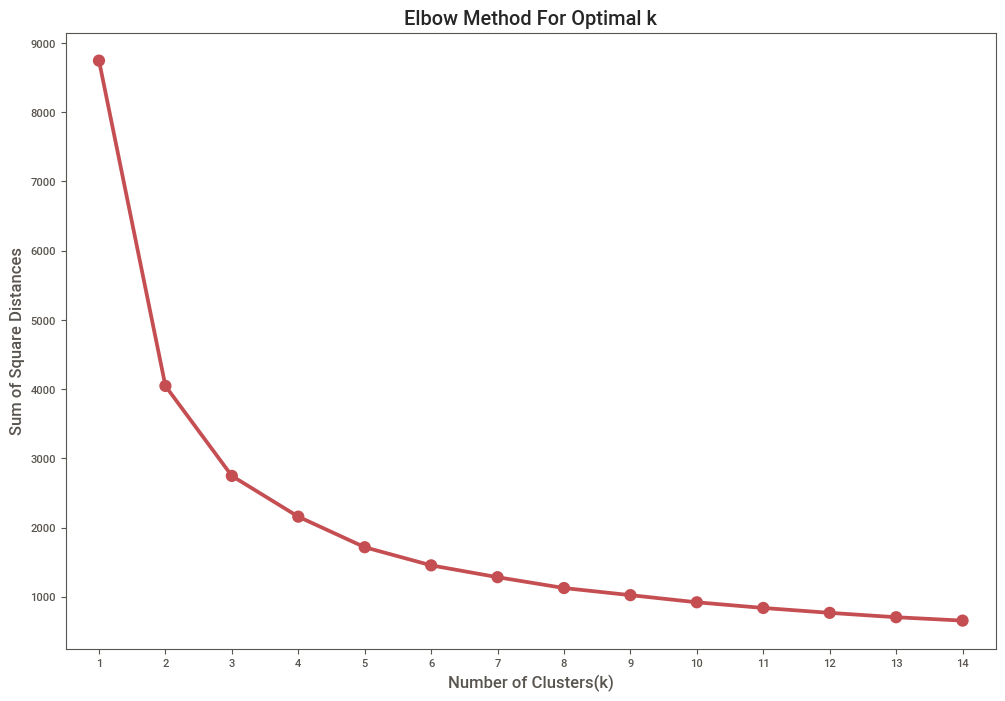

In [93]:
from sklearn.cluster import KMeans
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


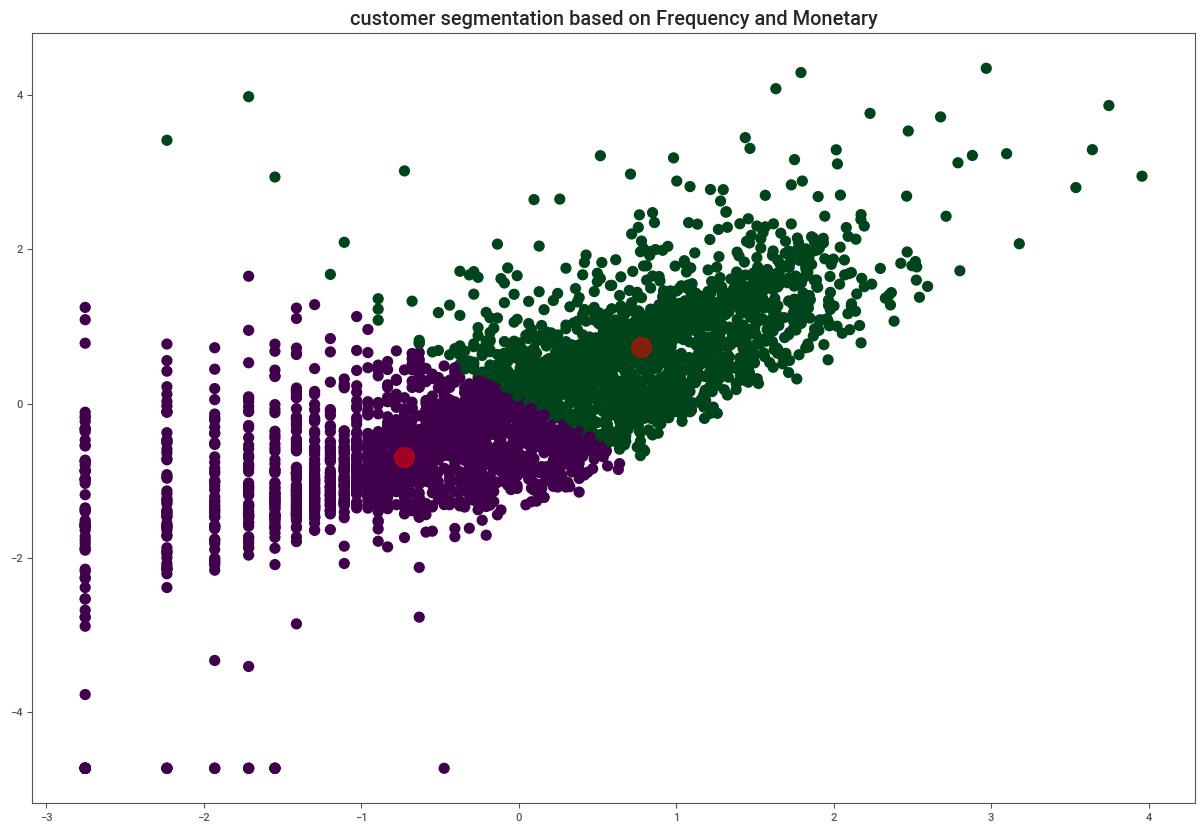

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are separated when we cluster them by Frequency and Monetary.***

## **Applying DBSCAN to Method on Frquency and Monetary**

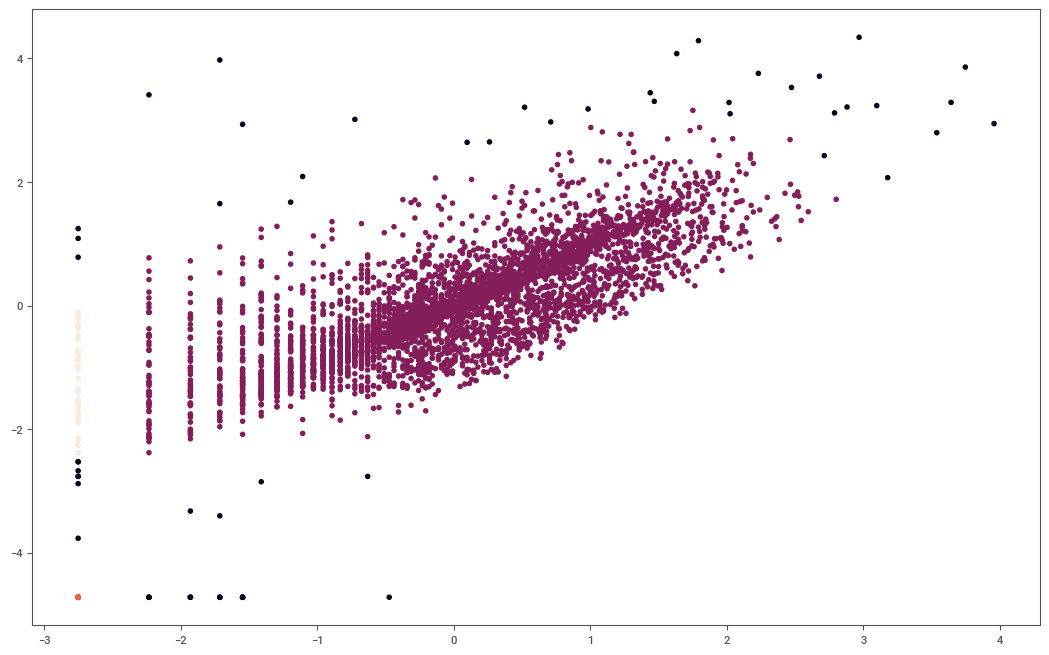

In [95]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

## **Applying Silhouette Method on Recency, Frequency and Monetary**

In [96]:
#scaling features
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [97]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3909899700249995


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.2997526123037021


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2940657089152807


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.28930385885532683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.2835402556728617


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.28463993407372035


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2723037723319512


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.2694687526999619


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.25685478373468795


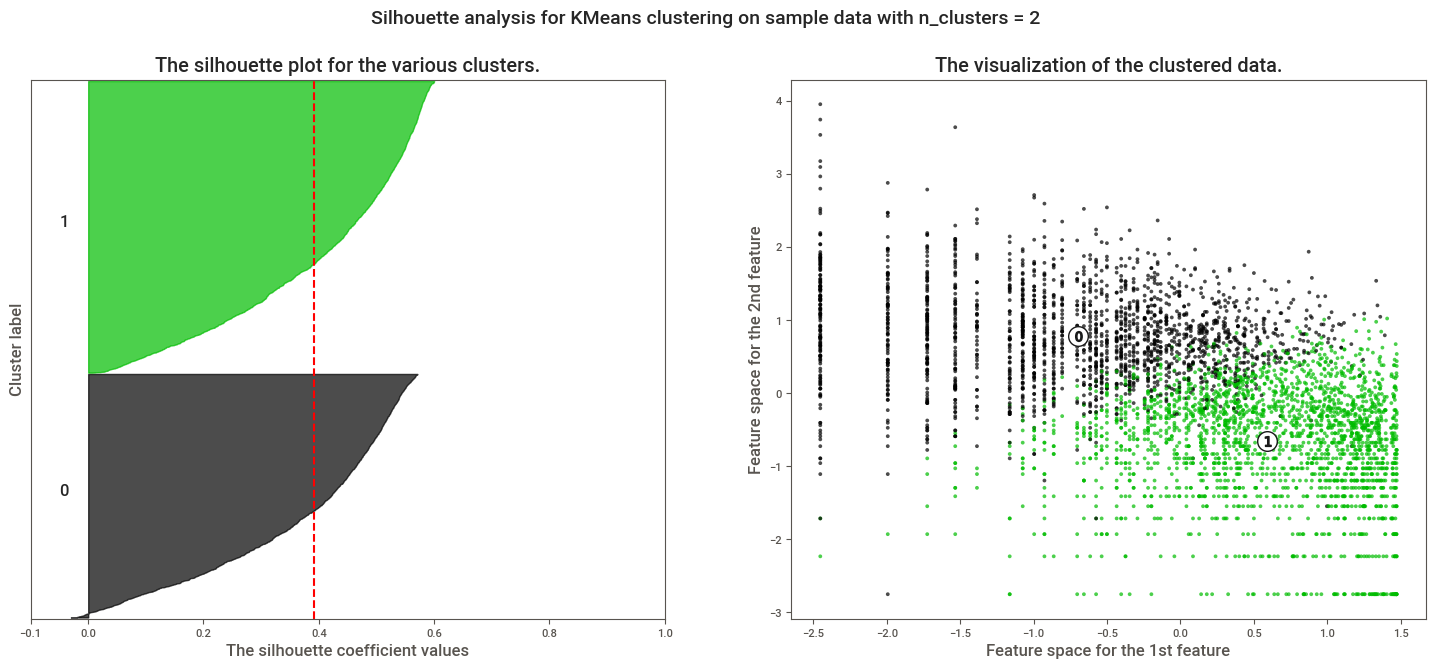

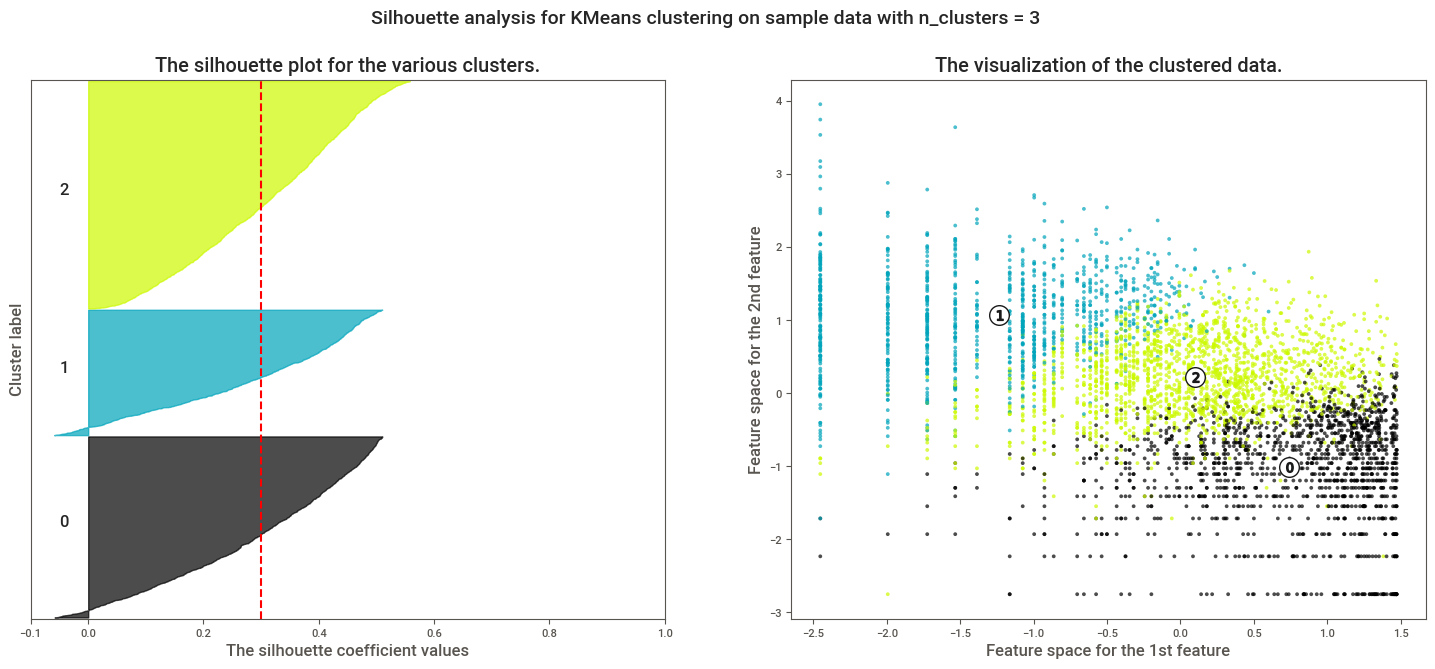

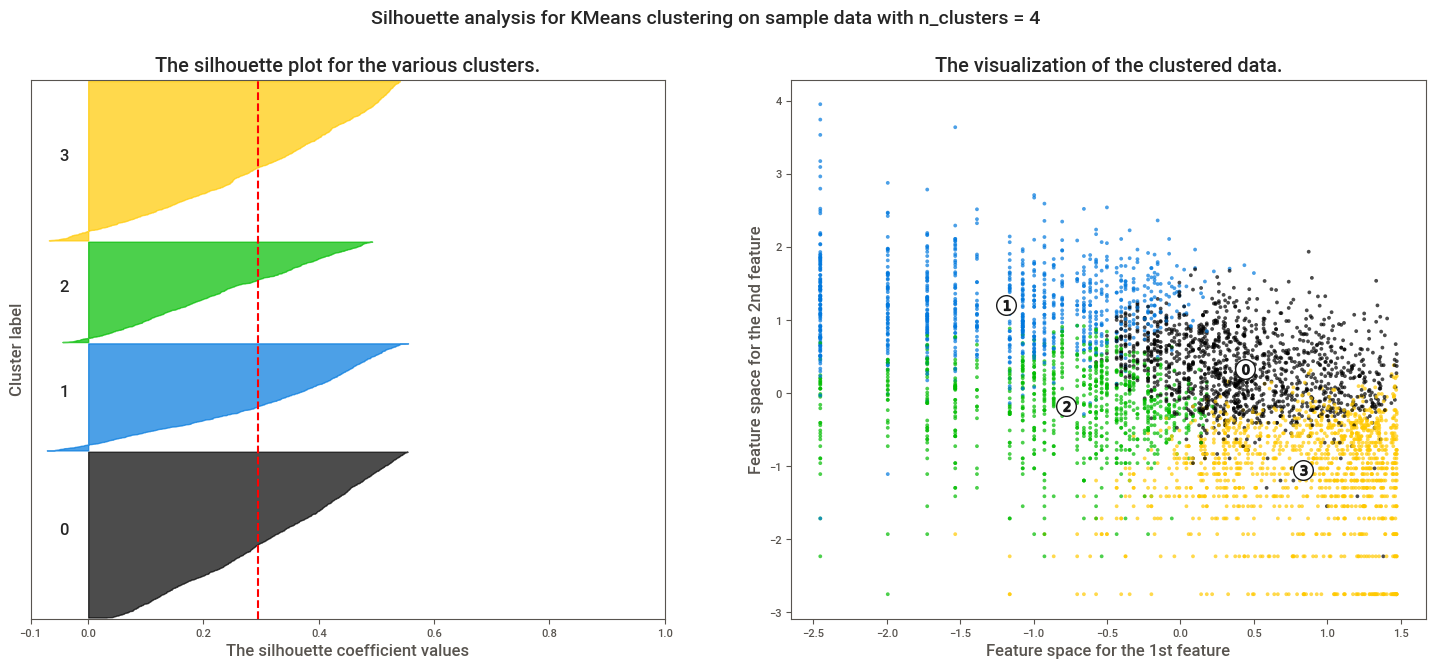

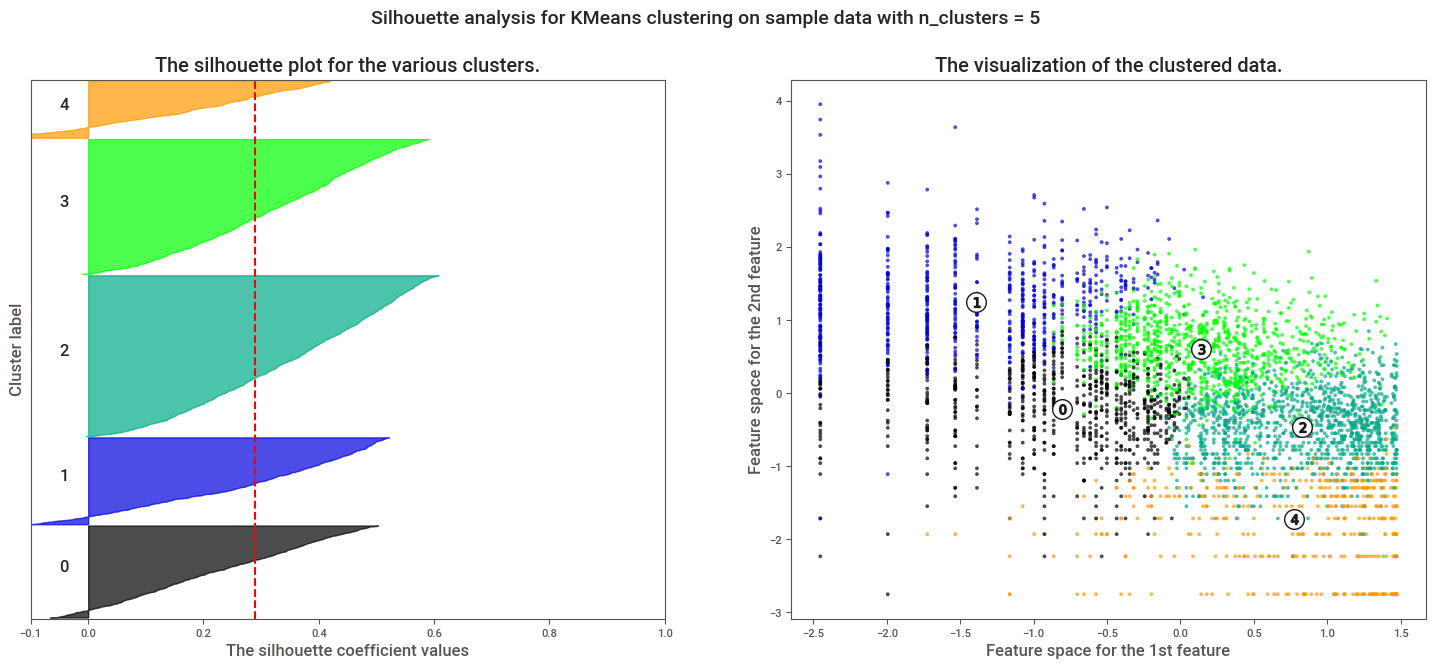

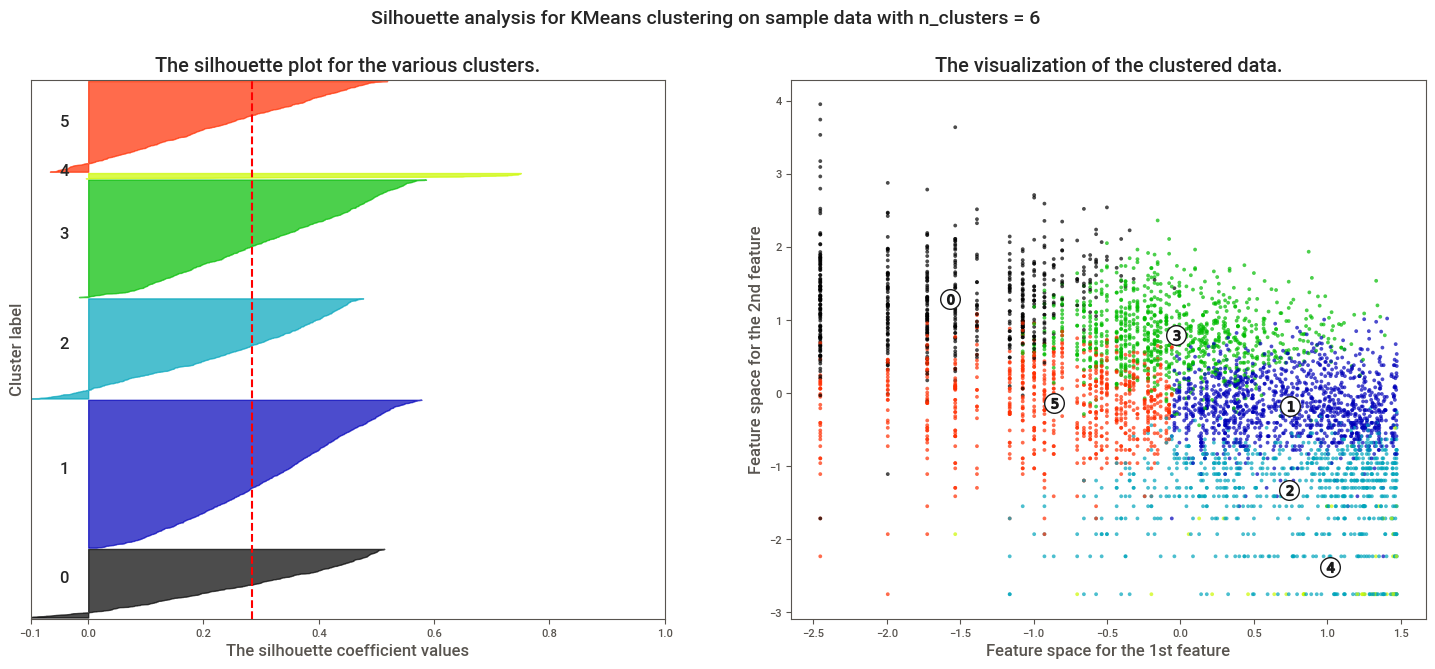

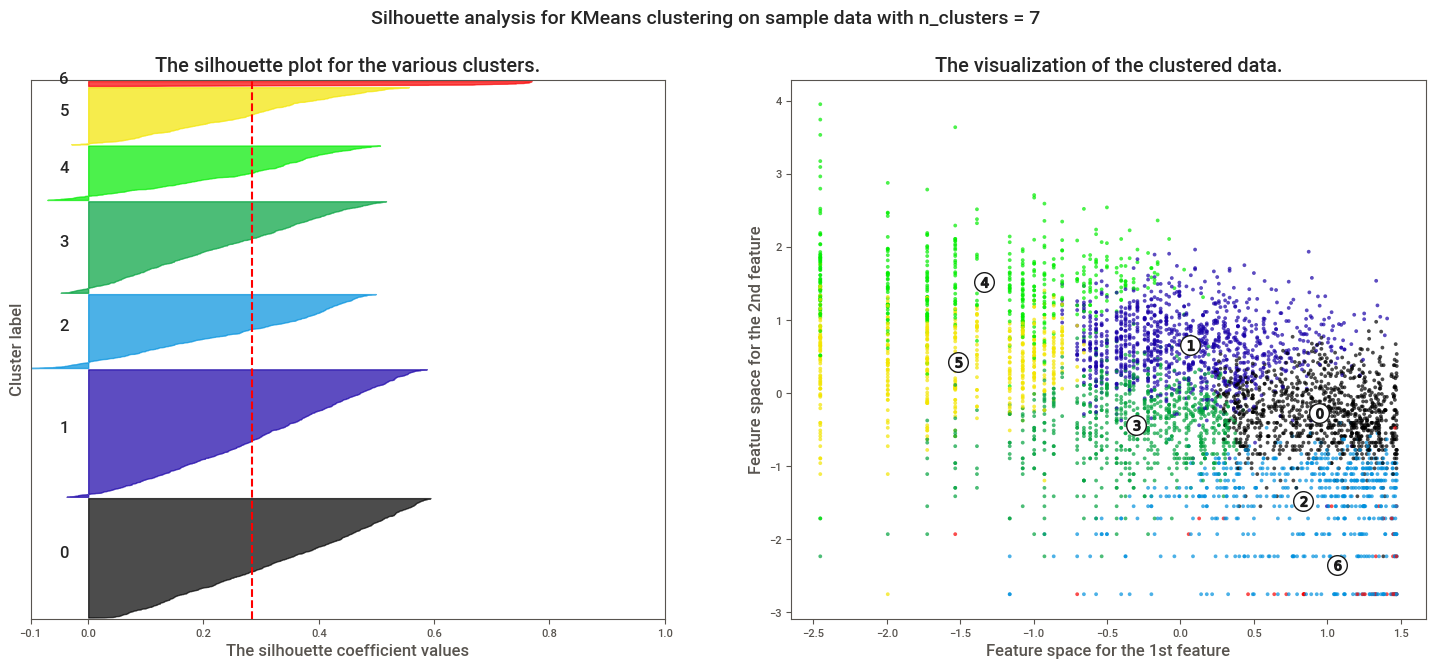

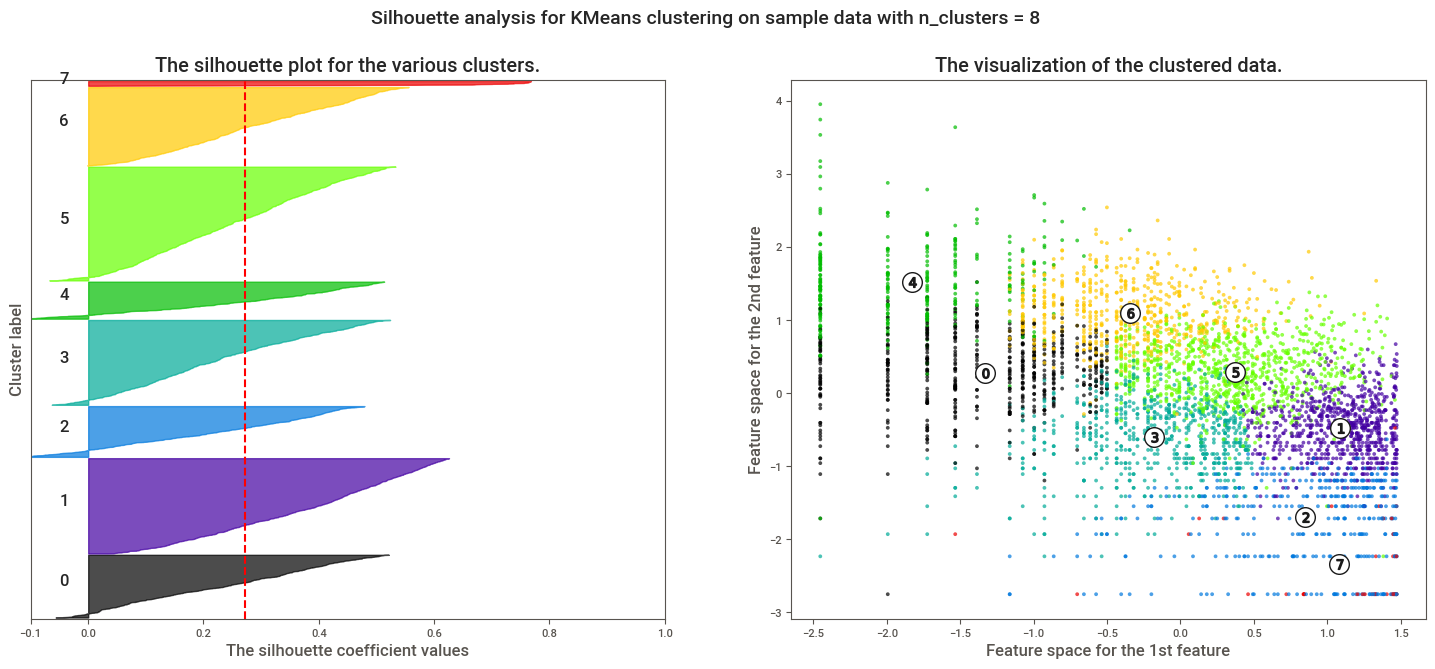

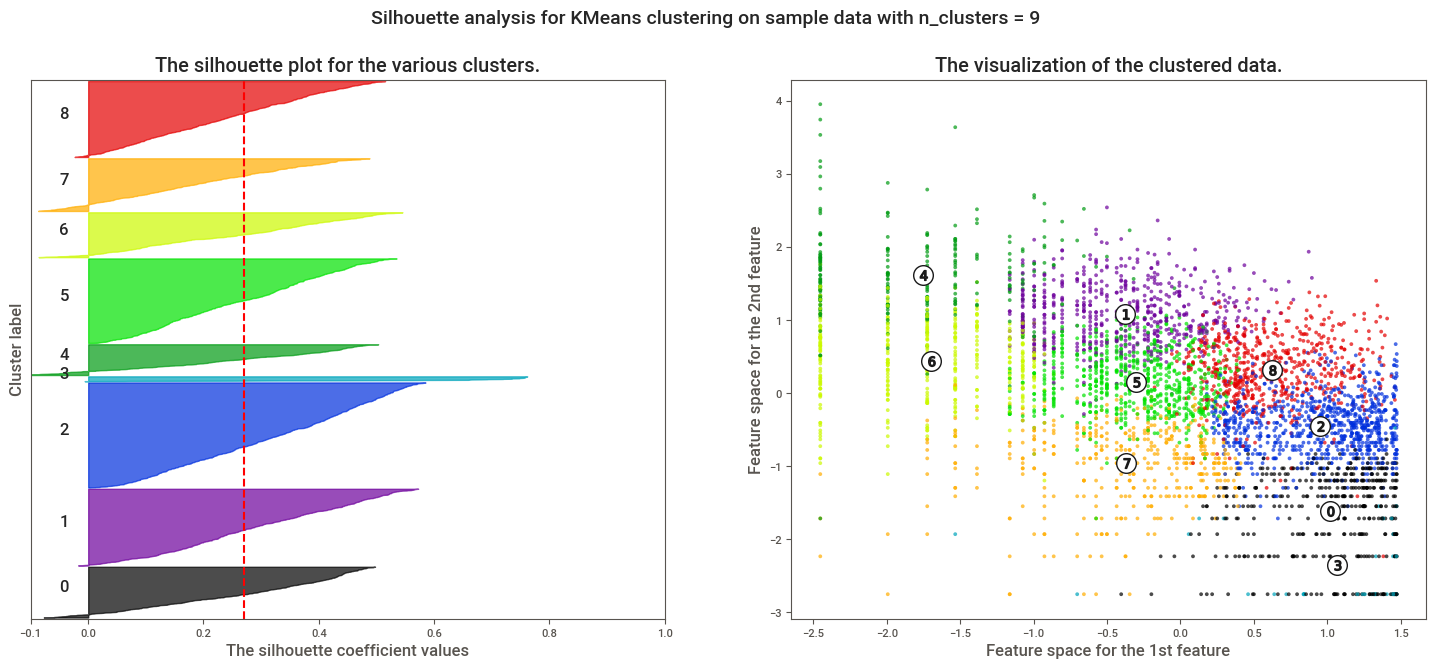

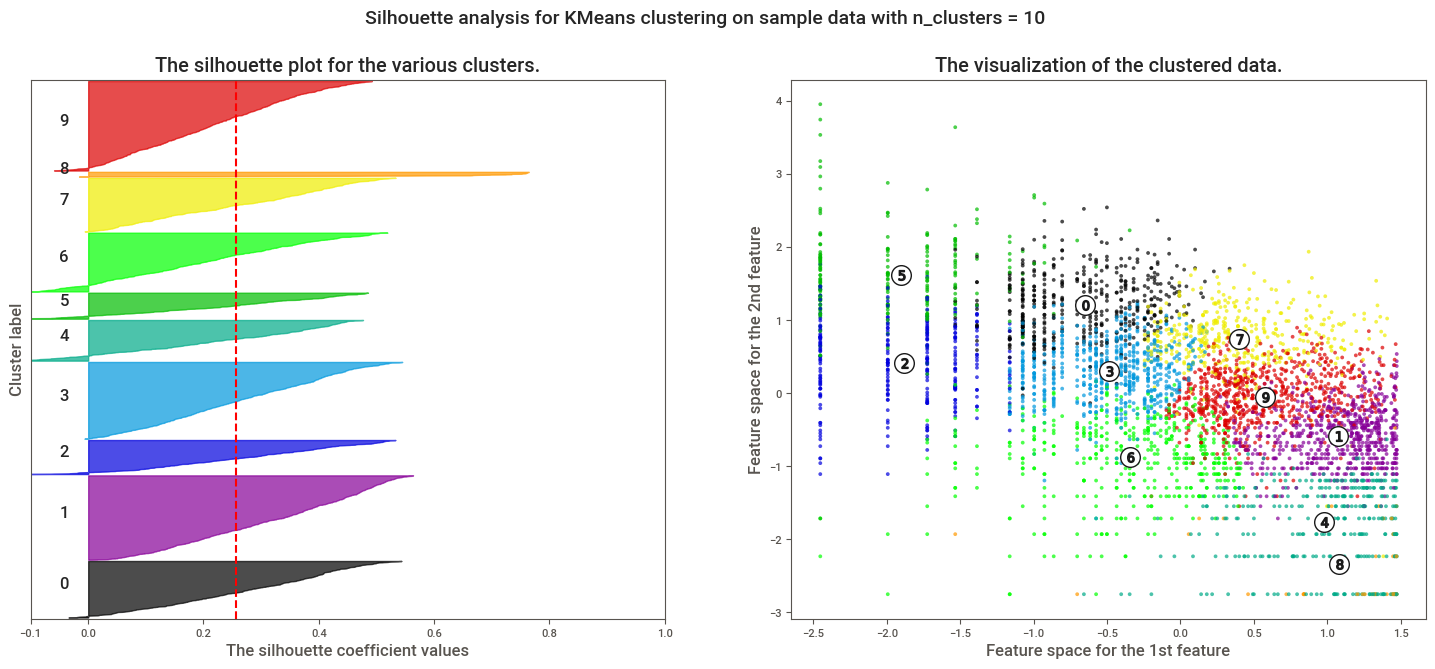

In [98]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

***From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


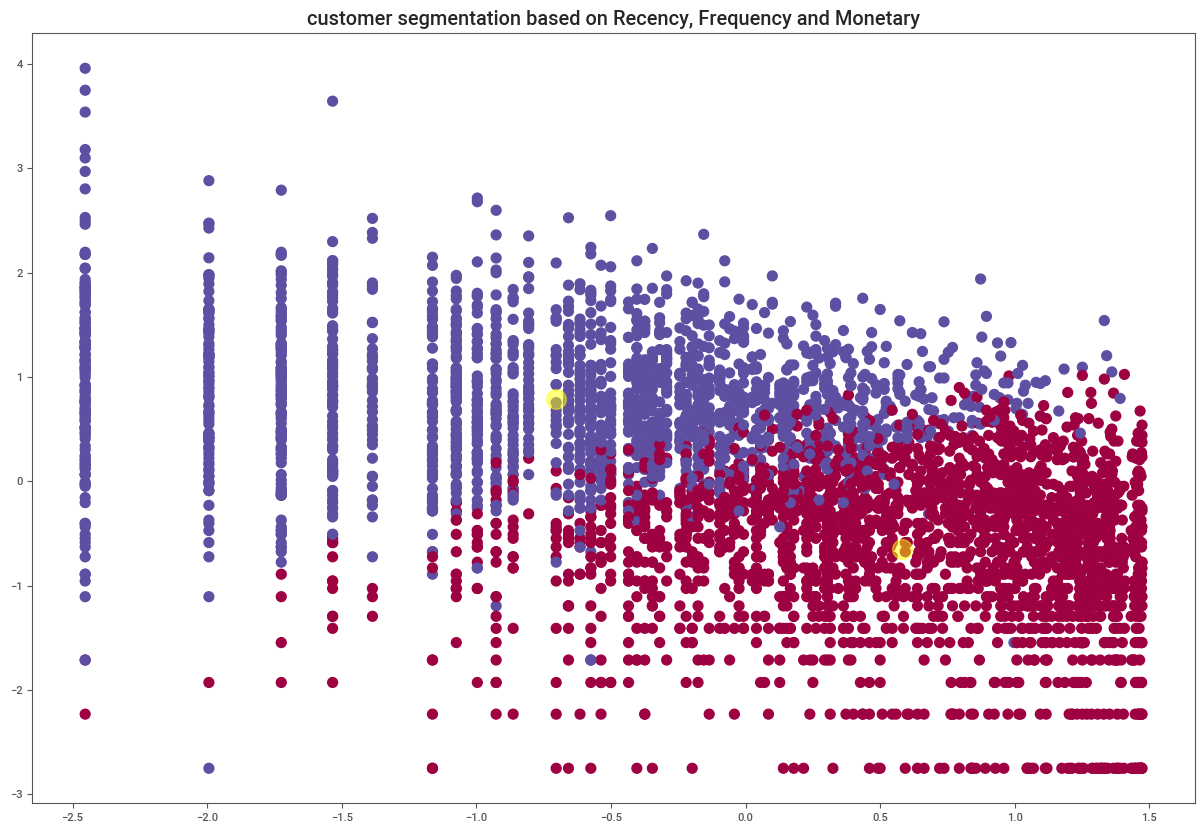

In [99]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

***Here we can see that, Customers are  separated when we cluster them by Recency, Frequency and Monetary.***

## **Applying Elbow Method on Recency, Frequency and Monetary**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

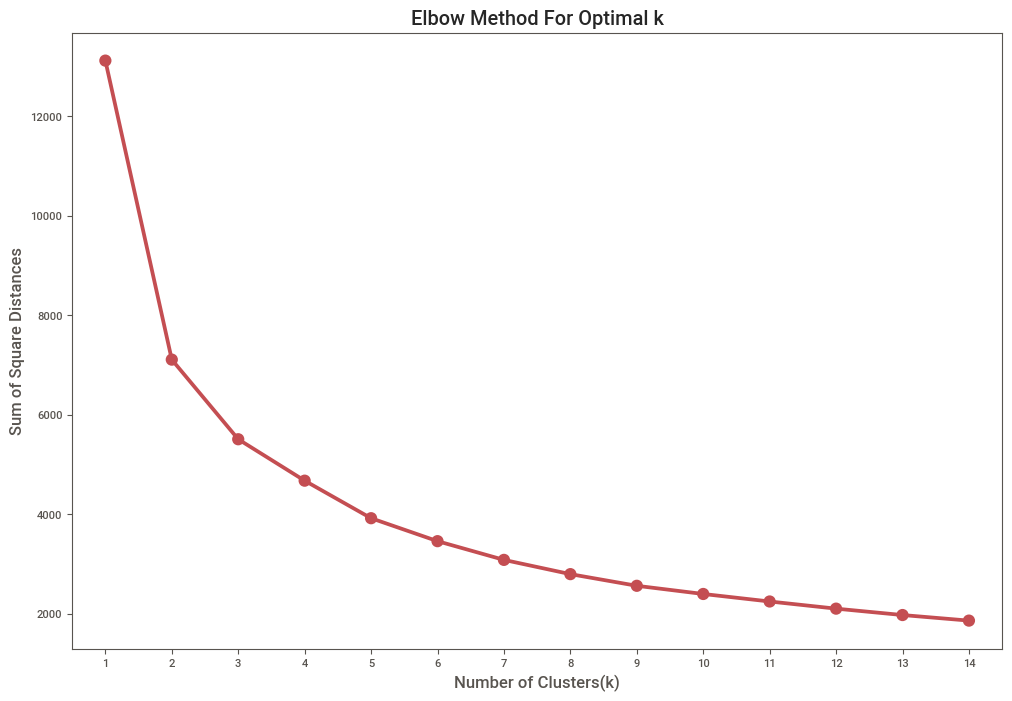

In [100]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

## **Applying DBSCAN to Recency, Frequency and Monetary**

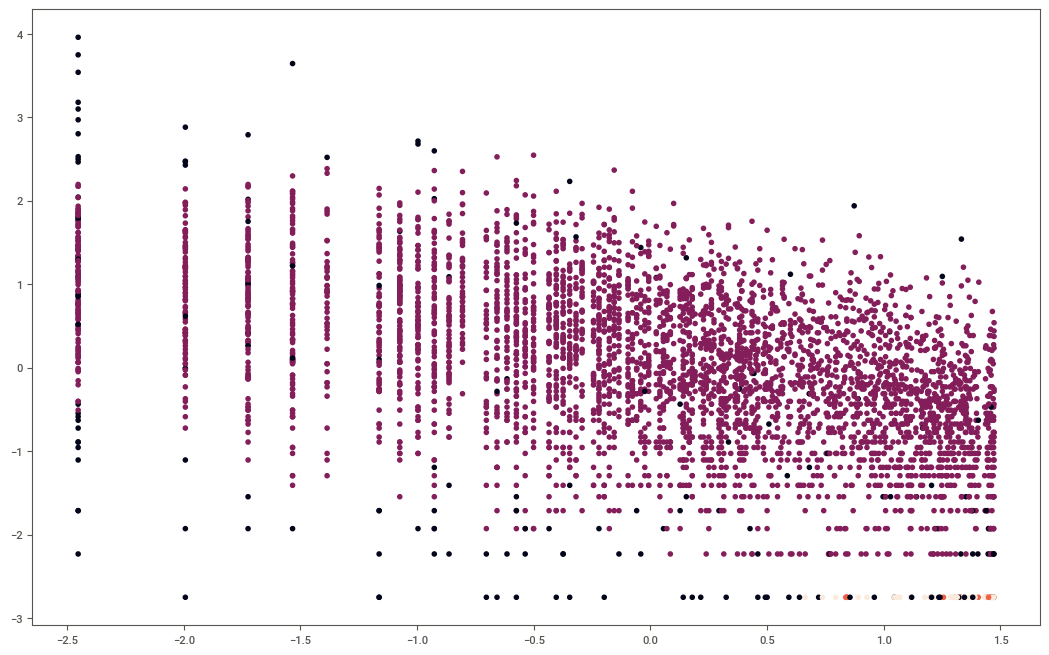

In [101]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

***Here we can see that, Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3.***

In [102]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          2  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         95   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.693147     11.253942        0  
12347.0        0.693147       5.204007      8.368693        1  
12348.0        4.317488       3.433987      7.494007        0  
12349.0        2.890372       4.290459      7.471676        1  
12350.0        5.736572       2.833213      5.812338        0  
12352.0        3.583519       4.553877      7.826459        1  
12353.0        5.318120       1.386294      4.488636        0  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        0  
12356.0        3.091042       4.077537      7.941449        1

In [103]:
#checking customer belongs to cluter 1
rfm_df[rfm_df['Cluster'] ==1]

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12347.0           2        182   4310.00  1  1  1      111         3   
12349.0          18         73   1757.55  2  2  1      221         5   
12352.0          36         95   2506.04  2  2  1      221         5   
12356.0          22         59   2811.43  2  2  1      221         5   
12357.0          33        131   6207.67  2  1  1      211         4   
...             ...        ...       ... .. .. ..      ...       ...   
18260.0         172        139   2628.35  4  1  1      411         6   
18263.0          23         62   1213.16  2  2  2      222         6   
18272.0           2        170   3078.58  1  1  1      111         3   
18283.0           3        721   2045.53  1  1  1      111         3   
18287.0          42         70   1837.28  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12347.0        0.693147       5.204007      8.368693        1  
12349.0        2.890372       4.290459      7.471676        1  
12352.0        3.583519       4.553877      7.826459        1  
12356.0        3.091042       4.077537      7.941449        1  
12357.0        3.496508       4.875197      8.733541        1  
...                 ...            ...           ...      ...  
18260.0        5.147494       4.934474      7.874112        1  
18263.0        3.135494       4.127134      7.100984        1  
18272.0        0.693147       5.135798      8.032224        1  
18283.0        1.098612       6.580639      7.623412        1  
18287.0        3.737670       4.248495      7.516041        1  

[1990 rows x 12 columns]

## **Hierarchical clustering**

**Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.**

### **Dendogram**

**A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.**

## **Dendogram to find the optimal number of clusters**

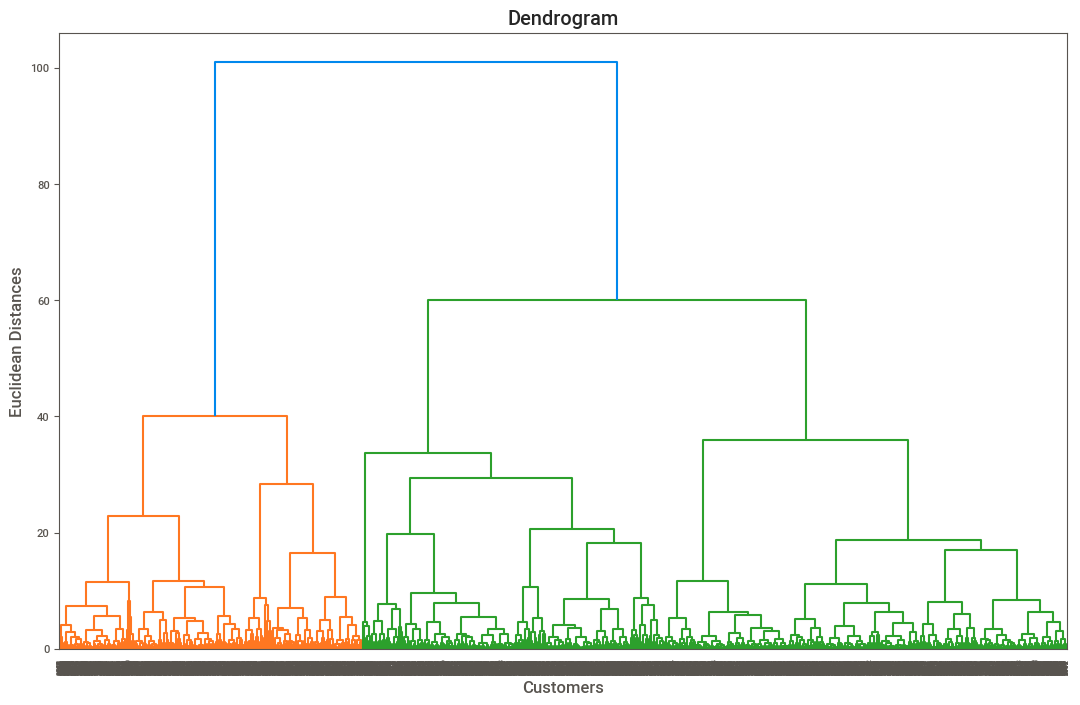

In [104]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

### **Here, we can see No. of Clusters = 2**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


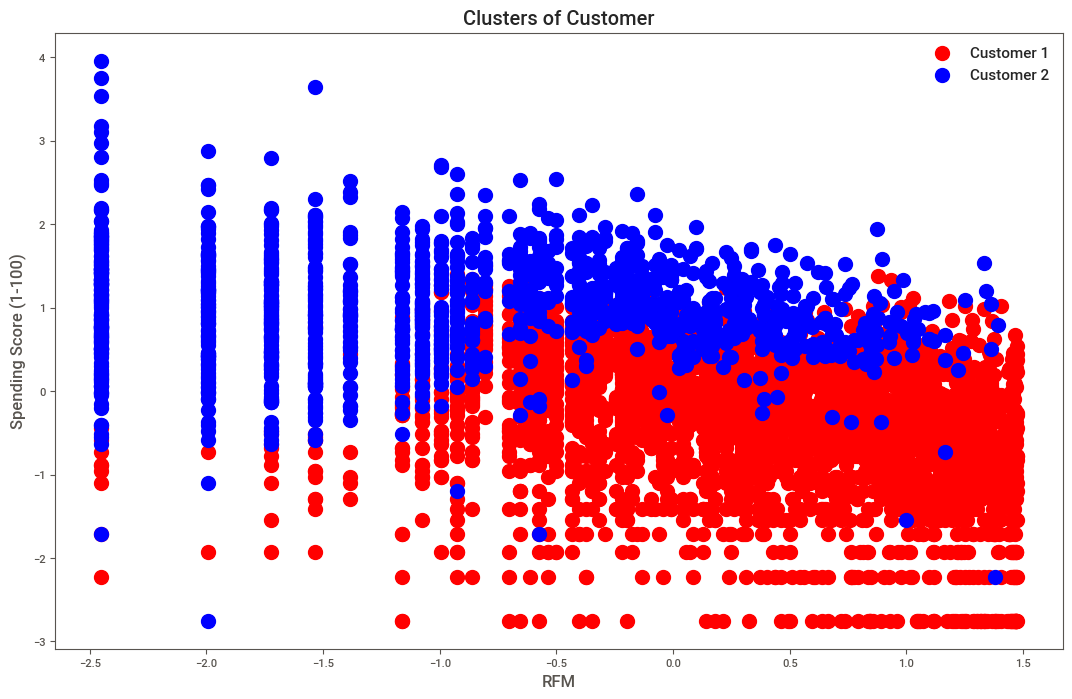

In [105]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [106]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})


Recency   Frequency     Monetary
Cluster                                     
0        143.747691   24.331654   461.663851
1         29.157789  172.686432  3913.346534

**We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.**

# **Summary**

In [107]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
|   10   |   Hierarchical clustering      | RFM  |  

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [108]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [109]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**





*   ***This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.***




*   ***Using  a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters  and got a silhoutte score of 0.39 for two clusters***





*  ***By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.***

*   ***The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.***



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***